In [21]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
import operator
import scipy
import math

import numpy as np
import scipy as sp
from  operator import itemgetter
from scipy.stats import norm


import collections
from collections import Counter
from statistics import mean #per la media

from grafici import htlc_distribution, feebase_distribution, feerate_distribution, double_hist_fee

In [2]:
#leggo il grafo dal file .gml 
#ln = nx.read_gml('output\grafi\grafodef.gml')

ln = nx.read_gml('output\grafi\multigrafo.gml')

In [54]:
numnodi = ln.number_of_nodes()
numarchi = ln.number_of_edges()

print(numnodi)
print(numarchi)

11044
42974


# ***ANALISI DISTRIBUZIONI FEE***

### *Def:*
### **min_htcl:** *valore minimo (espresso in msat) per cui un nodo è disposto a fare il forward di un pagamento*
### **fee_base:**  *tariffa fissa (espressa in mSat) addebitata su ogni transazione instradata attraverso un certo nodo*
### **fee_rate:** : *millisatoshi aggiuntivi richiesti per ogni milione di satoshi inviati*



In [82]:
#per calcolare le distribuzioni

htlc1 = [int(c) for (u, v, c) in ln.edges.data('MINHTLC1') ]
htlc2 = [int(c) for (u, v, c) in ln.edges.data('MINHTLC2')]
htlc = htlc1+htlc2 
feebase1 = [c for (u, v, c) in ln.edges.data('FEEBASE1')]
feebase2 = [c for (u, v, c) in ln.edges.data('FEEBASE2')]
feebase = feebase1 + feebase2
feerate1 = [int(c) for (u, v, c) in ln.edges.data('FEERATE1')]
feerate2 = [int(c) for (u, v, c) in ln.edges.data('FEERATE2')]
feerate = feerate1 + feerate2

In [30]:
htlccounter = collections.Counter(htlc)
feebasecounter = collections.Counter(feebase)
fee2 = collections.Counter(feerate2)
feeratecounter = collections.Counter(feerate)

### **HTLC**

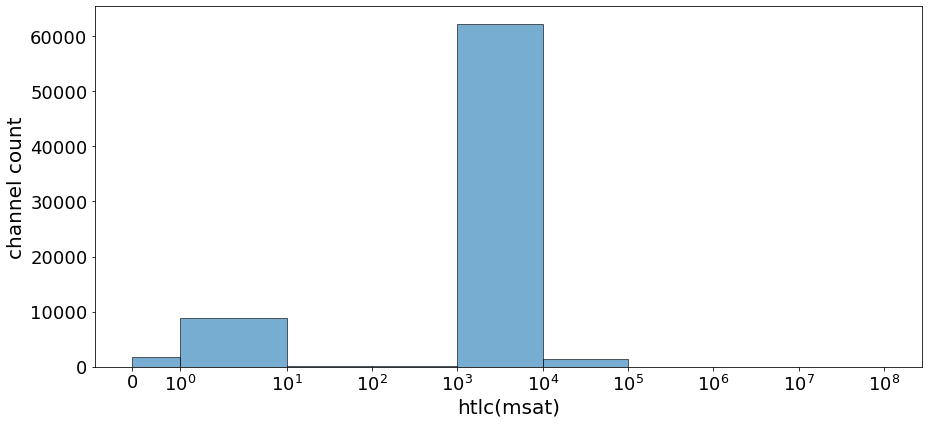

In [95]:
    #calcolo istogramma della distrubuzione dei valori di htlc
    htlc_distribution(htlc)
    

In [8]:
#percentuali htlc nei canali 

zero = 0
uno = 0
dieci = 0
cento = 0
mille = 0
centok = 0
milione = 0
dieciM = 0
centoM = 0


for key in htlccounter.keys():
    #if int(key) <= 0 :
    #    zero += htclcounter[key]
    if int(key) <= 1 and int(key) >= 0:
        uno += htlccounter[key]
    if int(key) <= 10 :
        dieci += htlccounter[key]
    if int(key) <= 100 :
        cento += htlccounter[key]
    if int(key) == 1000 :
        mille += htlccounter[key]
#   if int(key) <= 10000 :
#       diecimila += htclcounter[key]
    if int(key) <= 100000 :
        centok += htlccounter[key]
    if int(key) <= 1000000 :
        milione+= htlccounter[key]
    if int(key) <= 10000000 :
        dieciM+= htlccounter[key] 
    if int(key) <= 100000000 :
        centoM+= htlccounter[key]
        
print("La percentuale di canali con minhtlc <= 1 è ", str(round(uno*100/len(htlc),3)), "%")
print("La percentuale di canali con minhtlc <= 10 è ", str(round(dieci*100/len(htlc),3)), "%")
print("La percentuale di canali con minhtlc <= 100 è ", str(round(cento*100/len(htlc),3)), "%")
print("La percentuale di canali con minhtlc <= 1000 è ", str(round(mille*100/len(htlc),3)), "%")
#print("La percentuale di canali con minhtcl <= 10000 è ", str(round(diecimila*100/len(htcl1),3)), "%")
print("La percentuale di canali con minhtlc <= 100000 è ", str(round(centok*100/len(htlc),3)), "%")
print("La percentuale di canali con minhtlc <= 1000000 è ", str(round(milione*100/len(htlc),3)), "%")
print("La percentuale di canali con minhtlc <= 10000000 è ", str(round(dieciM*100/len(htlc),3)), "%")
print("La percentuale di canali con minhtlc <= 100000000 è ", str(round(centoM*100/len(htlc),3)), "%")


La percentuale di canali con minhtlc <= 1 è  12.359 %
La percentuale di canali con minhtlc <= 10 è  25.574 %
La percentuale di canali con minhtlc <= 100 è  25.723 %
La percentuale di canali con minhtlc <= 1000 è  72.424 %
La percentuale di canali con minhtlc <= 100000 è  99.948 %
La percentuale di canali con minhtlc <= 1000000 è  99.979 %
La percentuale di canali con minhtlc <= 10000000 è  99.994 %
La percentuale di canali con minhtlc <= 100000000 è  100.0 %


### **FEE_BASE**

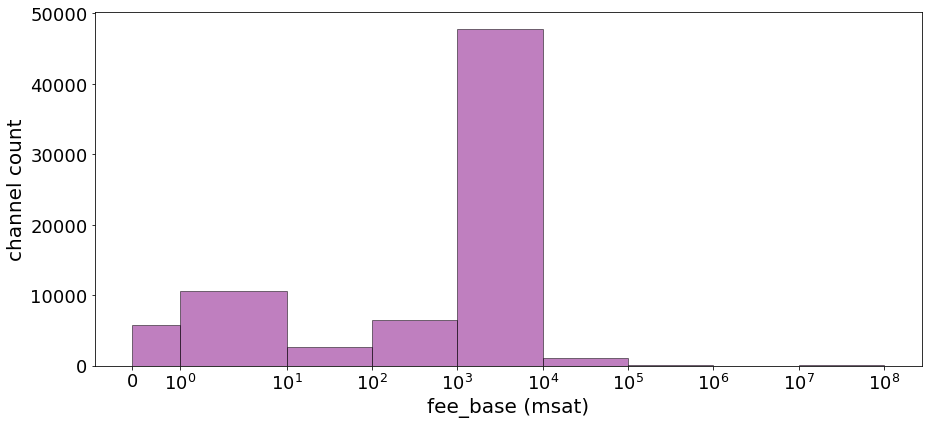

In [32]:
feebase_distribution(feebase)
#plt.savefig('feebase.png')


In [14]:
uno = 0
dieci = 0
cento = 0
mille = 0
diecik = 0
centok = 0
milione = 0
dieciM = 0
centoM = 0
miliardo = 0

for key in feebasecounter.keys():
    if int(key) <= 1 :
        uno += feebasecounter[key]
    if int(key) <= 10 :
        dieci += feebasecounter[key]
    if int(key) <= 100 :
        cento += feebasecounter[key]
    if int(key) <= 1000 :
        mille += feebasecounter[key]
    if int(key) <= 100000 :
        centok += feebasecounter[key]
    if int(key) <= 1000000 :
        milione += feebasecounter[key]
    if int(key) <= 10000000 :
        dieciM += feebasecounter[key]
    if int(key) <= 100000000:
        centoM += feebasecounter[key]
    if int(key) <= 1000000000 :
        miliardo += feebasecounter[key]
        
        
print("La percentuale di canali con feebase <= 1 è ", str(round(uno*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 10 è ", str(round(dieci*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 100 è ", str(round(cento*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 1000 è ", str(round(mille*100/len(feebase),3)), "%")
#print("La percentuale di canali con feebase <= 10000 è ", str(round(diecimila*100/len(feerate),3)), "%")
print("La percentuale di canali con feebase <= 100000 è ", str(round(centok*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 1000000 è ", str(round(milione*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 10000000 è ", str(round(dieciM*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 100000000 è ", str(round(centoM*100/len(feebase),3)), "%")
print("La percentuale di canali con feebase <= 1000000000 è ", str(round(miliardo*100/len(feebase),3)), "%")

La percentuale di canali con feebase <= 1 è  31.271 %
La percentuale di canali con feebase <= 10 è  33.538 %
La percentuale di canali con feebase <= 100 è  37.188 %
La percentuale di canali con feebase <= 1000 è  93.322 %
La percentuale di canali con feebase <= 100000 è  99.874 %
La percentuale di canali con feebase <= 1000000 è  99.908 %
La percentuale di canali con feebase <= 10000000 è  99.967 %
La percentuale di canali con feebase <= 100000000 è  99.97 %
La percentuale di canali con feebase <= 1000000000 è  100.0 %


### **FEE_RATE**

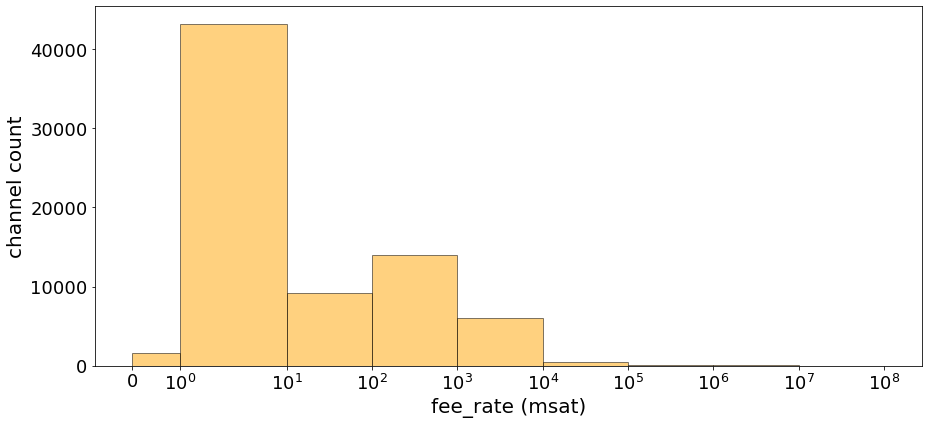

In [33]:
feerate_distribution(feerate)
#plt.savefig('feerate.png')

In [18]:
uno = 0
dieci = 0
cento = 0
mille = 0
diecik = 0
centok = 0
milione = 0
dieciM = 0
miliardo = 0

for key in feeratecounter.keys():
    if int(key) <= 1 :
        uno += feeratecounter[key]
    if int(key) <= 10 :
        dieci += feeratecounter[key]
    if int(key) <= 100 :
        cento += feeratecounter[key]
    if int(key) <= 1000 :
        mille += feeratecounter[key]
    if int(key) <= 10000 :
        diecik += feeratecounter[key]
    if int(key) <= 100000 :
        centok += feeratecounter[key]
    if int(key) <= 1000000 :
        milione += feeratecounter[key]
    if int(key) <= 10000000 :
        dieciM += feeratecounter[key]
    if int(key) <= 1000000000 :
        miliardo += feeratecounter[key]
        
        
print("La percentuale di canali con feerate <= 1 è ", str(round(uno*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 10 è ", str(round(dieci*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 100 è ", str(round(cento*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 1000 è ", str(round(mille*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 10000 è ", str(round(diecik*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 100000 è ", str(round(centok*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 1000000 è ", str(round(milione*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 10000000 è ", str(round(dieciM*100/len(feerate),3)), "%")
print("La percentuale di canali con feerate <= 1000000000 è ", str(round(miliardo*100/len(feerate),3)), "%")

La percentuale di canali con feerate <= 1 è  63.441 %
La percentuale di canali con feerate <= 10 è  68.719 %
La percentuale di canali con feerate <= 100 è  79.275 %
La percentuale di canali con feerate <= 1000 è  96.043 %
La percentuale di canali con feerate <= 10000 è  99.465 %
La percentuale di canali con feerate <= 100000 è  99.881 %
La percentuale di canali con feerate <= 1000000 è  99.95 %
La percentuale di canali con feerate <= 10000000 è  99.962 %
La percentuale di canali con feerate <= 1000000000 è  99.998 %


# ***ROOTS***

In [71]:
root_prop= {} #struttura per memorizzare i nodi radice e le loro proprietà

all_nodes = [node for node in ln.nodes() if ln.degree(node) >= 5]

for node in all_nodes:
    roses = [rose for rose in ln.neighbors(node) if ln.degree(rose) == 1]

    #for n in ln.neighbors(node): #scorro i vicini

    if len(roses) >= 3: #se almeno un vicino è una rosa avrò nel dict "root_prop" un campo relativo al nodo node
        root_prop[node] = {'degree': int, 'roses': [], 'blue': [], 'percent_roses': int } 
    
for node in root_prop.keys():
    for n in ln.neighbors(node): 
        if ln.degree(n) == 1:
            root_prop[node]['roses'].append(n) #roses contiene i vicini che sono rose (grado=1)
        else:
            root_prop[node]['blue'].append(n) #blue contiene i vicini che non sono rose (grado >1)
                
    
    root_prop[node]['degree'] = (ln.degree(node))
    #percent_roses rappresenta in percentuale la proporzione di rose a cui il nodo è collegato rispetto ai nodi blue
    root_prop[node]['percent_roses']=(float(len(root_prop[node]['roses']) / ln.degree(node) * 100)) 

print(len(root_prop))

173


In [61]:
#memorizzo la componente principale
largest_component = ln.subgraph(max(nx.connected_components(ln),key=len))
nx.write_gml(largest_component, "output\grafi\largest_component.gml") 
#ln_largest = nx.read_gml("largest_component.gml")

In [70]:
#percentuale dei nodi root nella largest_component
#perc_roots_largest = int(len(root_prop_largest) / len(root_prop) * 100)
#print("Il ", perc_roots_largest, " % dei nodi radice si trova nella componente centrale. ")


#percentuale dei nodi root sul totale:
perc_roots = int(len(root_prop) / ln.number_of_nodes() * 100)
print("I nodi root sono il ",perc_roots,"% dei nodi totali")

perc_nodes_largest = int(largest_component.number_of_nodes()) / ln.number_of_nodes() * 100
print("Il ", perc_nodes_largest, " % dei nodi si trova nella componente centrale. ")
perc_edges_largest = int(largest_component.number_of_edges()) / ln.number_of_edges() * 100
print("Il ", perc_edges_largest, " % dei nodi si trova nella componente centrale. ")

I nodi root sono il  1 % dei nodi totali
Il  98.39731981166244  % dei nodi si trova nella componente centrale. 
Il  99.74635826313585  % dei nodi si trova nella componente centrale. 


### ***Aggiungo attributo 'ISROOT' ai nodi radice per visualizzazione con graphia***

In [7]:
#?
#memorizzo i nodi che sono collegati a più nodi rossi (rose) che blu
selected_nodes = {}

for node in root_prop.keys():
    if(root_prop[node]['percent_roses'] > 40 ):#and largest_component.degree(node) >=4 ):
        selected_nodes[node]= root_prop[node]

In [74]:
#individuare altri nodi radice (??) collegati solo a rose oppure ad altri nodi roots
bouquet_roots = {}

for node in ln.nodes():
    #memorizzo i vicini che sono nodi root
    neigh = [nbr for nbr in ln.neighbors(node) if nbr in root_prop.keys()]

    #se il nodo n è collegato ad almeno un nodo root
    if(node not in root_prop.keys() and len(neigh) >= 2 and ln.degree(node)>=5):
        nodes_add = [nd for nd in ln.neighbors(node) if ln.degree(nd) == 1 or nd in neigh] #prova ln.degree(nd) == 2 anche

        if len(nodes_add) == len(list(ln.neighbors(node))):

            bouquet_roots[node] = {'degree': int, 'root_neigh': [], 'roses': [], 'blue': []} 
            
            
for n in bouquet_roots.keys():
    for nb in ln.neighbors(n):
        
        if ln.degree(nb) == 1:
            bouquet_roots[n]['roses'].append(nb) #roses contiene i vicini che sono rose (grado=1)
        elif nb in root_prop.keys():
            bouquet_roots[n]['root_neigh'].append(nb) #contiene i vicini che sono root 
    
    bouquet_roots[n]['degree'] = (ln.degree(n))


display(len(bouquet_roots))



132

In [75]:
all_nodes =  list(root_prop.keys()) + list(bouquet_roots.keys())  #list(selected_nodes.keys())
display(len(all_nodes))

305

In [76]:
node_attr = {}

for node in ln.nodes():
    new = {'ISROOT' : 1 if node in root_prop.keys() else 0}
    node_attr[node] = new
nx.set_node_attributes(ln, node_attr)


nx.write_gml(ln, "output\grafi\grafo_root_all.gml") #grafo ottenuto con l'algoritmo precedente ma la condizione affinchè un nodo sia key della struttura è solo che uno dei suoi vicini abbia grado1

In [57]:
edges_0 = []
edges_1 = []

for edge in ln.edges(data=True):
    
    if edge[0] in root_prop.keys(): #lo memorizzo nella prima lista così so che devo prendere il primo nodo per le distribuzioni
        edges_0.append(edge)
    elif edge[1] in root_prop.keys(): #lo memorizzo nella seconda lista così so che devo prendere il secondo nodo per le distribuzioni
        edges_1.append(edge)

In [77]:
#distribuzioni delle commissioni applicate dai nodi radice 
htlc1_ = [edges_0[i][2]['MINHTLC1'] for i in range(len(edges_0))]
htlc2_ = [edges_1[i][2]['MINHTLC2'] for i in range(len(edges_1))]
htlc_ = htlc1_+htlc2_ 
feebase1_ = [edges_0[i][2]['FEEBASE1'] for i in range(len(edges_0))]
feebase2_ = [edges_1[i][2]['FEEBASE2'] for i in range(len(edges_1))]
feebase_ = feebase1_+ feebase2_
feerate1_ = [edges_0[i][2]['FEERATE1'] for i in range(len(edges_0))]
feerate2_ = [edges_1[i][2]['FEERATE2'] for i in range(len(edges_1))]
feerate_ = feerate1_ + feerate2_

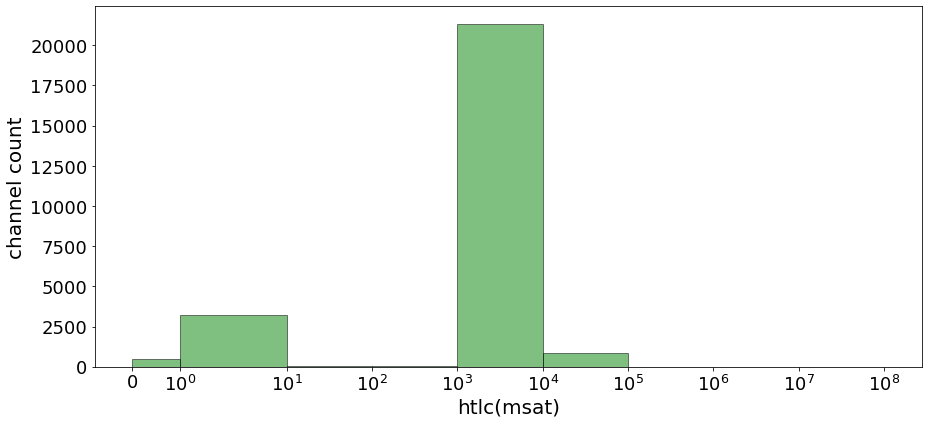

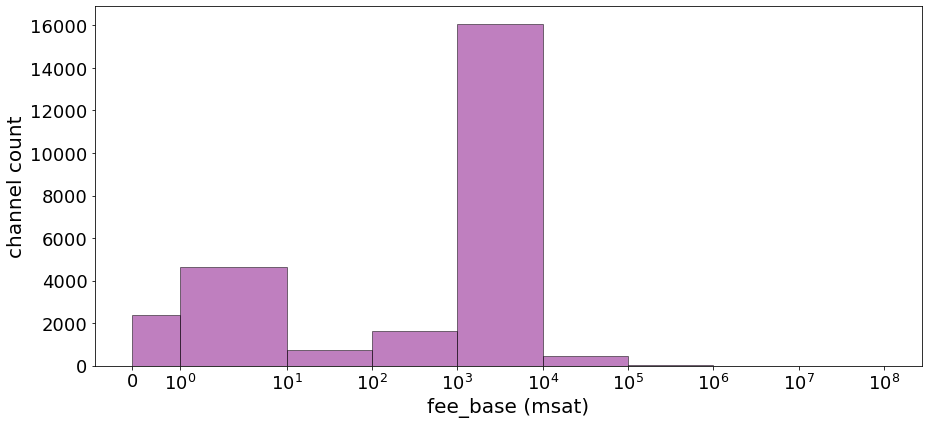

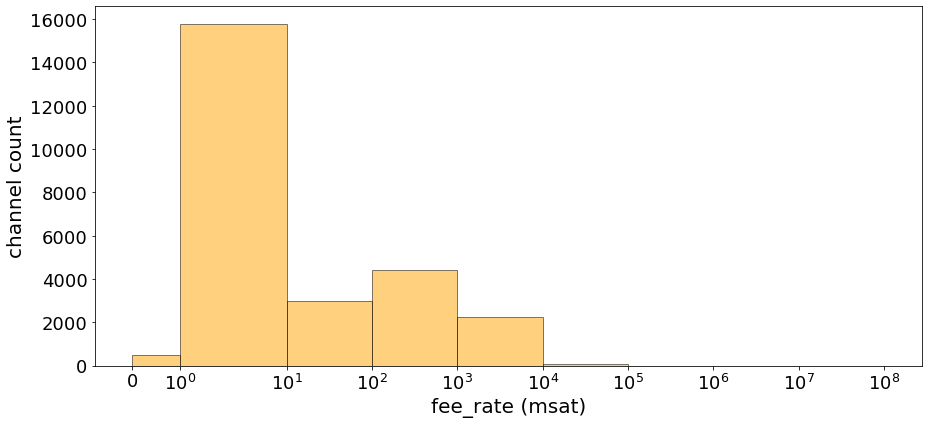

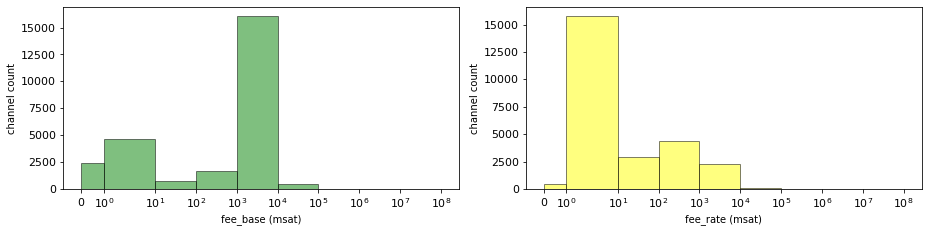

In [79]:
htlc_distribution(htlc_)
feebase_distribution(feebase_)
feerate_distribution(feerate_)
double_hist_fee(feebase_,feerate_)

In [60]:
#memorizzo i canali dei nodi root con grado >= 200
edges_max_degree = {'canali_uscenti': [], 'canali_incidenti': []}

for node in root_prop.keys():
    if root_prop[node].get('degree') >= 200:
            edges_max_degree['canali_uscenti'] = edges_max_degree['canali_uscenti'] + [edge for edge in ln.edges(data=True) if node == edge[0]]
            edges_max_degree['canali_incidenti'] = edges_max_degree['canali_incidenti'] + [edge for edge in ln.edges(data=True) if node == edge[1]]

In [241]:
#distribuzioni 
htlc1dist = [edges_max_degree['canali_uscenti'][i][2]['MINHTLC1'] for i in range(len(edges_max_degree['canali_uscenti']))]
htlc2dist = [edges_max_degree['canali_incidenti'][i][2]['MINHTLC2'] for i in range(len(edges_max_degree['canali_incidenti']))]
htlcdist = htlc1dist+htlc2dist
feebase1dist = [edges_max_degree['canali_uscenti'][i][2]['FEEBASE1'] for i in range(len(edges_max_degree['canali_uscenti']))]
feebase2dist = [edges_max_degree['canali_incidenti'][i][2]['FEEBASE2'] for i in range(len(edges_max_degree['canali_incidenti']))]
feebasedist = feebase1dist + feebase2dist
feerate1dist = [edges_max_degree['canali_uscenti'][i][2]['FEERATE1'] for i in range(len(edges_max_degree['canali_uscenti']))]
feerate2dist = [edges_max_degree['canali_incidenti'][i][2]['FEERATE2'] for i in range(len(edges_max_degree['canali_incidenti']))]
feeratedist = feerate1dist + feerate2dist

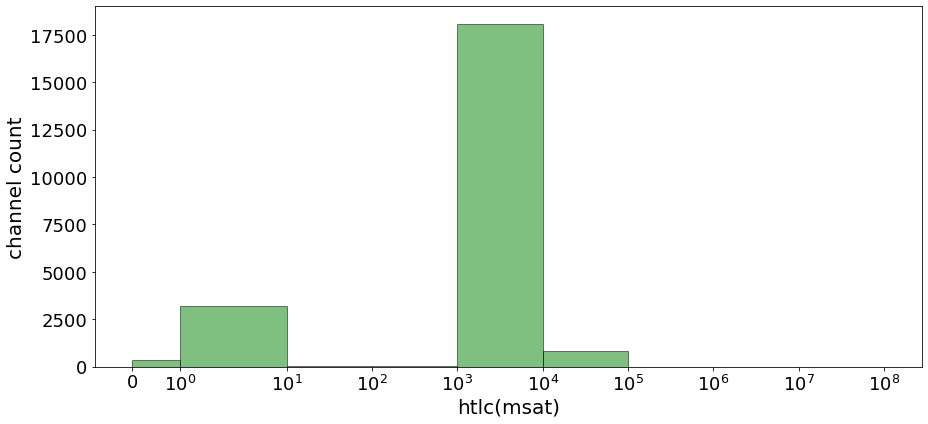

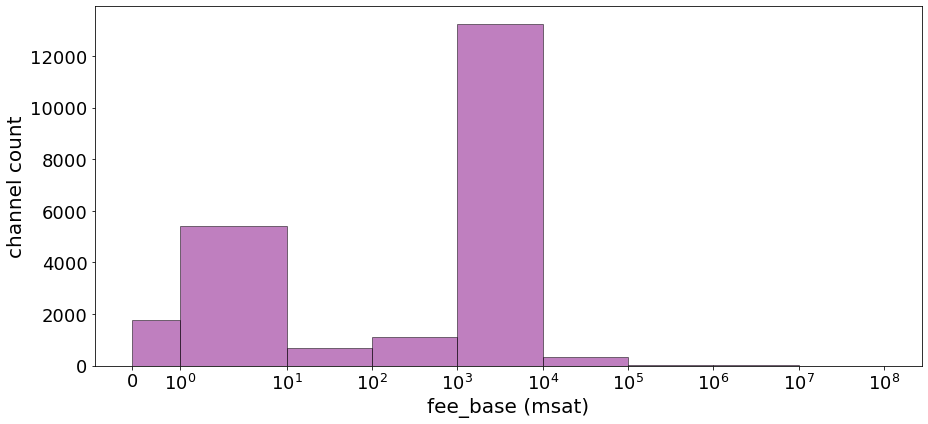

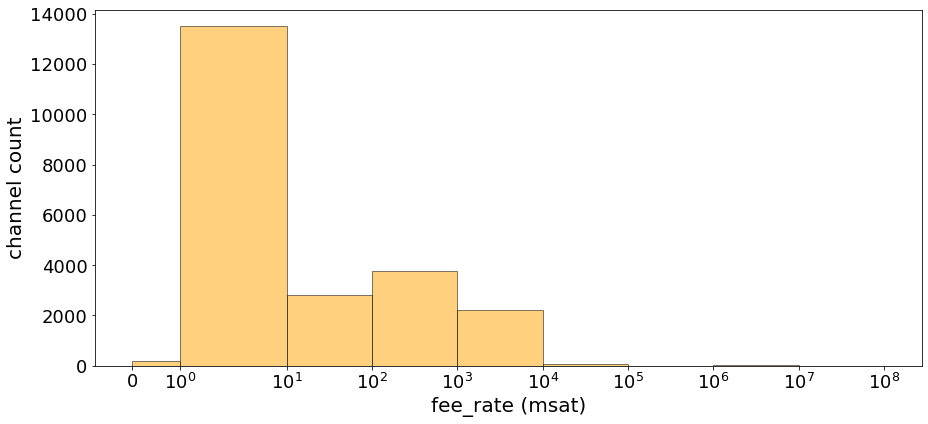

In [242]:
htlc_distribution(htlcdist)
feebase_distribution(feebasedist)
feerate_distribution(feeratedist)

# ***ANALISI CENTRALITA'***



## Trasformo il multigrafo in Grafo, facendo la media delle componenti degli archi

In [3]:
G = nx.Graph()

for edge in ln.edges(data=True,keys=True):

    u = edge[0]
    v = edge[1]

    k = edge[2]

    if not G.has_edge(u,v):

        G.add_edge(u,v)
        
        htlc1 = mean(d.get('MINHTLC1',-1) for d in ln.get_edge_data(u,v).values())
        htlc2 = mean(d.get('MINHTLC2',-1) for d in ln.get_edge_data(u,v).values())
        feebase1 = mean(d.get('FEEBASE1',-1) for d in ln.get_edge_data(u,v).values())
        feebase2 = mean(d.get('FEEBASE2',-1) for d in ln.get_edge_data(u,v).values())
        feerate1 = mean(d.get('FEERATE1',-1) for d in ln.get_edge_data(u,v).values())
        feerate2 = mean(int(d.get('FEERATE2',-1)) for d in ln.get_edge_data(u,v).values())
    

        G[u][v]['ID'] = k
        G[u][v]['HTLC1'] = htlc1
        G[u][v]['HTLC2'] = htlc2
        G[u][v]['FEEBASE1'] = feebase1
        G[u][v]['FEEBASE2'] = feebase2
        G[u][v]['FEERATE1'] = feerate1
        G[u][v]['FEERATE2'] = feerate2


In [4]:
edges = ln.edges()
c = collections.Counter(edges)
c1 = [edge for edge,value in c.items() if value >=2 ] #memorizzo solo i multielementi
#c2 = [edge for edge,value in c.items() if value ==1 ]
#c.most_common()
#display(len(c1)) #numero di multielementi
#display(c.most_common())


In [7]:
#dizionario in cui memorizzo, per ogni canale, i valori delle fee - lo uso per calcolare lo scostamento dalla media con la deviazione standard
dict_array_valori = {}
for edge in c1:

    dict_array_valori[edge] = {'HTLC1': [], 'HTLC2': [], 'FEEBASE1': [], 'FEEBASE2': [], 'FEERATE1': [], 'FEERATE2': []}

    dict_array_valori[edge]['HTLC1'] = [d.get('MINHTLC1',-1) for d in ln.get_edge_data(edge[0],edge[1]).values()]
    dict_array_valori[edge]['HTLC2'] = [d.get('MINHTLC2',-1) for d in ln.get_edge_data(edge[0],edge[1]).values()]
    dict_array_valori[edge]['FEEBASE1'] = [d.get('FEEBASE1',-1) for d in ln.get_edge_data(edge[0],edge[1]).values()]
    dict_array_valori[edge]['FEEBASE2'] = [d.get('FEEBASE2',-1) for d in ln.get_edge_data(edge[0],edge[1]).values()]
    dict_array_valori[edge]['FEERATE1']= [d.get('FEERATE2',-1) for d in ln.get_edge_data(edge[0],edge[1]).values()]
    dict_array_valori[edge]['FEERATE2']= [d.get('FEERATE2',-1) for d in ln.get_edge_data(edge[0],edge[1]).values()]

In [8]:
#dizionario in cui memorizzo, per ogni canale i valori dello scostamento per ogni attributo
dict_dev_std = {}

for edge in c1:

    dict_dev_std[edge] = {'HTLC1': float, 'HTLC2': float, 'FEEBASE1': float, 'FEEBASE2': float, 'FEERATE1': float, 'FEERATE2': float}

    dict_dev_std[edge]['HTLC1'] = np.std(np.array(dict_array_valori[edge]['HTLC1']).astype(np.float64),ddof=1)
    dict_dev_std[edge]['HTLC2'] = np.std(np.array(dict_array_valori[edge]['HTLC2']).astype(np.float64),ddof=1) 
    dict_dev_std[edge]['FEEBASE1'] = np.std(np.array(dict_array_valori[edge]['FEEBASE1']).astype(np.float64),ddof=1)
    dict_dev_std[edge]['FEEBASE2'] = np.std(np.array(dict_array_valori[edge]['FEEBASE2']).astype(np.float64),ddof=1)
    dict_dev_std[edge]['FEERATE1']= np.std(np.array(dict_array_valori[edge]['FEERATE1']).astype(np.float64),ddof=1)
    dict_dev_std[edge]['FEERATE2']= np.std(np.array(dict_array_valori[edge]['FEERATE2']).astype(np.float64),ddof=1)


In [67]:
zero =  [edge for edge in dict_dev_std.keys() if dict_dev_std[edge]['HTLC1'] == 0 and dict_dev_std[edge]['HTLC2'] == 0 and dict_dev_std[edge]['FEEBASE1'] == 0 and  dict_dev_std[edge]['FEEBASE2'] == 0 and dict_dev_std[edge]['FEERATE1'] == 0 and dict_dev_std[edge]['FEERATE2'] == 0]
tre = [edge for edge in dict_dev_std.keys() if dict_dev_std[edge]['HTLC1'] > 0 and dict_dev_std[edge]['HTLC2'] >0 and dict_dev_std[edge]['FEEBASE1'] > 0 and  dict_dev_std[edge]['FEEBASE2'] > 0 and dict_dev_std[edge]['FEERATE1'] > 0 and dict_dev_std[edge]['FEERATE2'] > 0]

uno_htlc = [edge for edge in dict_dev_std.keys() if dict_dev_std[edge]['HTLC1'] >0 and dict_dev_std[edge]['HTLC2'] > 0 and dict_dev_std[edge]['FEEBASE1'] == 0 and  dict_dev_std[edge]['FEEBASE2'] == 0 and dict_dev_std[edge]['FEERATE1'] == 0 and dict_dev_std[edge]['FEERATE2'] == 0]
uno_base = [edge for edge in dict_dev_std.keys() if dict_dev_std[edge]['HTLC1'] == 0 and dict_dev_std[edge]['HTLC2'] == 0 and dict_dev_std[edge]['FEEBASE1'] > 0 and  dict_dev_std[edge]['FEEBASE2'] > 0 and dict_dev_std[edge]['FEERATE1'] == 0 and dict_dev_std[edge]['FEERATE2'] == 0]
uno_rate = [edge for edge in dict_dev_std.keys() if dict_dev_std[edge]['HTLC1'] == 0 and dict_dev_std[edge]['HTLC2'] == 0 and dict_dev_std[edge]['FEEBASE1'] == 0 and  dict_dev_std[edge]['FEEBASE2'] == 0 and dict_dev_std[edge]['FEERATE1'] > 0 and dict_dev_std[edge]['FEERATE2'] > 0]

uno_htlc_cento = [edge for edge in dict_dev_std.keys() if dict_dev_std[edge]['HTLC1'] >=100 and dict_dev_std[edge]['HTLC2'] >=100 and dict_dev_std[edge]['FEEBASE1'] == 0 and  dict_dev_std[edge]['FEEBASE2'] == 0 and dict_dev_std[edge]['FEERATE1'] == 0 and dict_dev_std[edge]['FEERATE2'] == 0]
uno_base_cento = [edge for edge in dict_dev_std.keys() if dict_dev_std[edge]['HTLC1'] == 0 and dict_dev_std[edge]['HTLC2'] == 0 and dict_dev_std[edge]['FEEBASE1'] >=100 and  dict_dev_std[edge]['FEEBASE2'] >=100 and dict_dev_std[edge]['FEERATE1'] == 0 and dict_dev_std[edge]['FEERATE2'] == 0]
uno_rate_cento = [edge for edge in dict_dev_std.keys() if dict_dev_std[edge]['HTLC1'] == 0 and dict_dev_std[edge]['HTLC2'] == 0 and dict_dev_std[edge]['FEEBASE1'] == 0 and  dict_dev_std[edge]['FEEBASE2'] == 0 and dict_dev_std[edge]['FEERATE1'] >=100 and dict_dev_std[edge]['FEERATE2'] >=100]

uno_htlc_mille = [edge for edge in dict_dev_std.keys() if dict_dev_std[edge]['HTLC1'] >=1000 and dict_dev_std[edge]['HTLC2'] >=1000 and dict_dev_std[edge]['FEEBASE1'] == 0 and  dict_dev_std[edge]['FEEBASE2'] == 0 and dict_dev_std[edge]['FEERATE1'] == 0 and dict_dev_std[edge]['FEERATE2'] == 0]
uno_base_mille = [edge for edge in dict_dev_std.keys() if dict_dev_std[edge]['HTLC1'] == 0 and dict_dev_std[edge]['HTLC2'] == 0 and dict_dev_std[edge]['FEEBASE1'] >=1000 and  dict_dev_std[edge]['FEEBASE2'] >=1000 and dict_dev_std[edge]['FEERATE1'] == 0 and dict_dev_std[edge]['FEERATE2'] == 0]
uno_rate_mille = [edge for edge in dict_dev_std.keys() if dict_dev_std[edge]['HTLC1'] == 0 and dict_dev_std[edge]['HTLC2'] == 0 and dict_dev_std[edge]['FEEBASE1'] == 0 and  dict_dev_std[edge]['FEEBASE2'] == 0 and dict_dev_std[edge]['FEERATE1'] >=1000 and dict_dev_std[edge]['FEERATE2'] >=1000]

due_htlc_b = [edge for edge in dict_dev_std.keys() if dict_dev_std[edge]['HTLC1'] >0 and dict_dev_std[edge]['HTLC2'] >0 and dict_dev_std[edge]['FEEBASE1'] > 0 and  dict_dev_std[edge]['FEEBASE2'] > 0 and dict_dev_std[edge]['FEERATE1'] == 0 and dict_dev_std[edge]['FEERATE2'] == 0]
due_htlc_r = [edge for edge in dict_dev_std.keys() if dict_dev_std[edge]['HTLC1'] >0 and dict_dev_std[edge]['HTLC2'] >0 and dict_dev_std[edge]['FEEBASE1'] == 0 and  dict_dev_std[edge]['FEEBASE2'] == 0 and dict_dev_std[edge]['FEERATE1'] > 0 and dict_dev_std[edge]['FEERATE2'] > 0]
due_b_r = [edge for edge in dict_dev_std.keys() if dict_dev_std[edge]['HTLC1'] == 0 and dict_dev_std[edge]['HTLC2'] ==0 and dict_dev_std[edge]['FEEBASE1'] > 0 and  dict_dev_std[edge]['FEEBASE2'] > 0 and dict_dev_std[edge]['FEERATE1'] > 0 and dict_dev_std[edge]['FEERATE2'] > 0]


magcento = [edge for edge in dict_dev_std.keys() if dict_dev_std[edge]['HTLC1'] >100 or dict_dev_std[edge]['HTLC2'] >100 or dict_dev_std[edge]['FEEBASE1'] >100 or  dict_dev_std[edge]['FEEBASE2'] >100 or dict_dev_std[edge]['FEERATE1'] >100 or dict_dev_std[edge]['FEERATE2'] >100]
magmille = [edge for edge in dict_dev_std.keys() if dict_dev_std[edge]['HTLC1'] >1000 or dict_dev_std[edge]['HTLC2'] >1000 or dict_dev_std[edge]['FEEBASE1'] >1000 or  dict_dev_std[edge]['FEEBASE2'] >1000 or dict_dev_std[edge]['FEERATE1'] >1000 or dict_dev_std[edge]['FEERATE2'] >1000]

In [66]:
perc_zero = int(len(zero) / len(dict_dev_std) * 100)
print("Nel ", perc_zero, " % dei canali non c'è scostamento.")
perc_uno = int((len(uno_htlc)+len(uno_base)+len(uno_rate)) / len(dict_dev_std) * 100)
print("Nel ", perc_uno, " % dei canali c'è scostamento su una sola coppia di valori.")

perc_tre = int(len(tre) / len(dict_dev_std) * 100)
print("Nello ", perc_tre, " % dei canali c'è scostamento in tutte e tre le coppie di valori.")
perc_uno_maggcento = int((len(uno_htlc_cento)+len(uno_base_cento)+len(uno_rate_cento)) / len(dict_dev_std) * 100)
print("Nel ", perc_uno_maggcento, " % dei canali c'è scostamento su una sola coppia di valori, e lo scostamento è >=100.")
perc_uno_magmille = int((len(uno_htlc_mille)+len(uno_base_mille)+len(uno_rate_mille)) / len(dict_dev_std) * 100)
print("Nel ", perc_uno_magmille, " % dei canali c'è scostamento su una sola coppia di valori, e lo scostamento è >=1000.")

perc_magcento = int(len(magcento) / len(dict_dev_std) * 100)
print("Nel ", perc_magcento, " % dei canali almeno un valore dello scostamento è >=100.")


perc_magmille = int(len(magmille) / len(dict_dev_std) * 100)
print("Nel ", perc_magmille, " % dei canali almeno un valore dello scostamento è >=1000.")

Nel  64  % dei canali non c'è scostamento.
Nel  18  % dei canali c'è scostamento su una sola coppia di valori.
Nello  0  % dei canali c'è scostamento in tutte e tre le coppie di valori.
Nel  12  % dei canali c'è scostamento su una sola coppia di valori, e lo scostamento è >=100.
Nel  1  % dei canali c'è scostamento su una sola coppia di valori, e lo scostamento è >=1000.
Nel  27  % dei canali almeno un valore dello scostamento è >=100.
Nel  3  % dei canali almeno un valore dello scostamento è >=1000.


In [11]:
(ln.number_of_edges())-len(c1) #numero di multielementi
perc_multielements = (2938 / ln.number_of_edges() * 100)
print(perc_multielements)

6.836691953274072


## Analisi Beetwenness centrality

In [6]:
betw = nx.betweenness_centrality(G, seed=0)

### grafico distribuzione valori di betweenness centrality rispetto al grado dei nodi

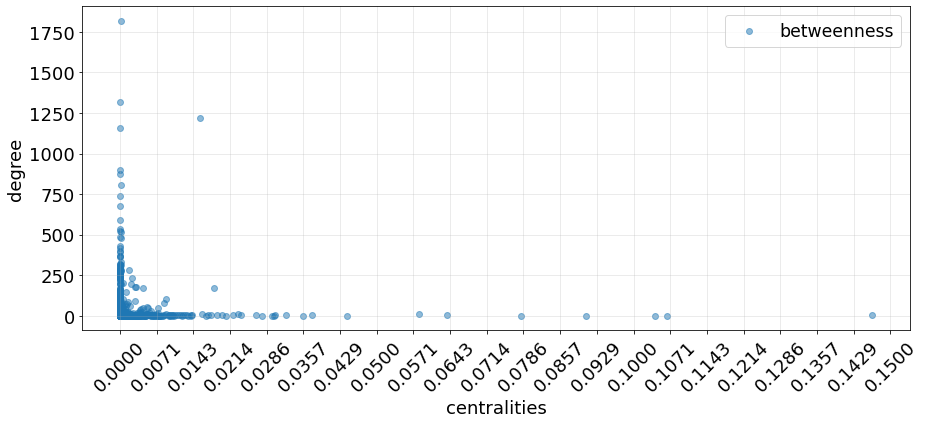

In [8]:
plt.figure(figsize=(13,6))

degrees = [ln.degree(node) for node in ln.nodes()]

plt.scatter(betw.values(), degrees, alpha=0.5)
#plt.scatter(betw.values(), degrees, alpha=0.5)
#plt.scatter(degr.values(), degrees, alpha=0.3)
    # plt.scatter(closeness, degrees, alpha=0.5)

plt.grid(b=None, alpha=0.3, which='major', axis='both')

n = len(betw)
bins = int(n**(1/float(3)))

plt.xticks(np.linspace(0,0.15,bins), rotation=45)

#plt.xticks(np.linspace(0,max(clos.values())), rotation=45)
plt.legend(["betweenness"], loc='upper right', fontsize="xx-large")

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.xlabel('centralities', fontsize=18)
plt.ylabel('degree', fontsize=18)
plt.tight_layout()
plt.savefig("betww.png")


### selezione dei primi 10 nodi con betweenness più alta

In [9]:
#primi 10 nodi più centrali secondo la betwenness
sorted_betwenness = sorted(betw.items(), key = operator.itemgetter(1), reverse=True)
betwenness = []
for i in range(0,10,1):
    betwenness.append(sorted_betwenness[i][0])

In [10]:
#memorizzo 
high_betw_dict = {'node': [], 'edge_id': [],  'htlc': [], 'feebase' : [], 'feerate' : []}

for edges in G.edges(data=True):

    for n in betwenness:
        
        u = edges[0]
        v = edges[1]

        if n == u :
            high_betw_dict['node'].append(u)
            
            high_betw_dict['edge_id'].append(G[u][v]['ID']) 
            high_betw_dict['htlc'].append(G[u][v]['HTLC1']) 
            high_betw_dict['feebase'].append(G[u][v]['FEEBASE1'])
            high_betw_dict['feerate'].append(G[u][v]['FEERATE1'])

            
        elif n == v :
            high_betw_dict['node'].append(v)

            high_betw_dict['edge_id'].append(G[u][v]['ID']) 
            high_betw_dict['htlc'].append(G[u][v]['HTLC2']) 
            high_betw_dict['feebase'].append(G[u][v]['FEEBASE2'])
            high_betw_dict['feerate'].append(G[u][v]['FEERATE2'])

df_betw = pd.DataFrame(data=high_betw_dict)


In [11]:
dict_fee_betw = {}

for n in betwenness:
    
    dict_fee_betw[n] = {'HTLC':[],'FEEBASE':[],'FEERATE':[]}

    for i in range(len(df_betw)):
     #nodi selezionati

        if df_betw.loc[i,'node'] == n :

            dict_fee_betw[n]['HTLC'].append(df_betw.loc[i,'htlc'])
            dict_fee_betw[n]['FEEBASE'].append(df_betw.loc[i,'feebase'])
            dict_fee_betw[n]['FEERATE'].append(df_betw.loc[i,'feerate'])

df_values_betw = pd.DataFrame(data=dict_fee_betw)


### grafici distribuzioni fee applicate dai 10 nodi con valori di betweenness più alti

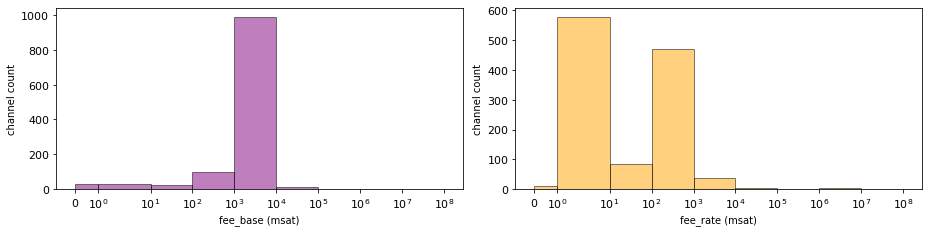

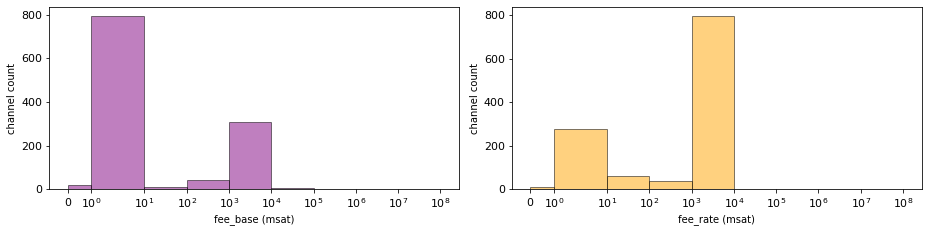

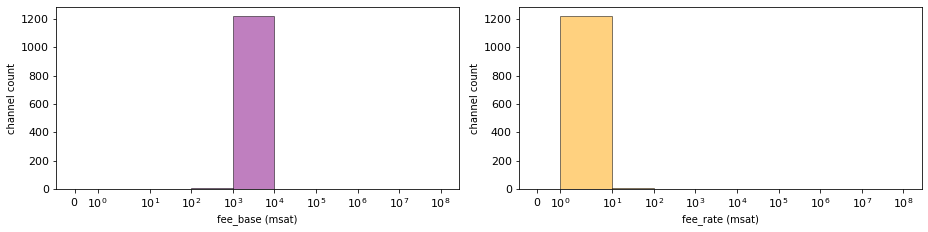

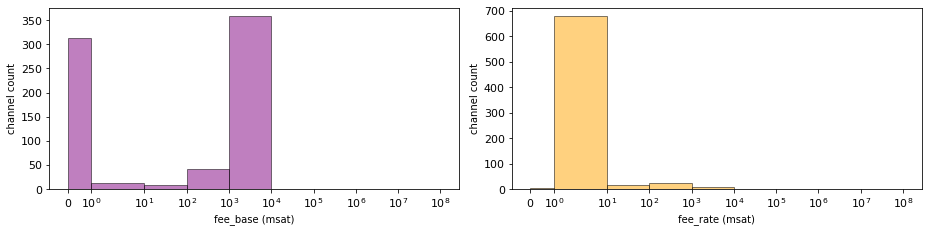

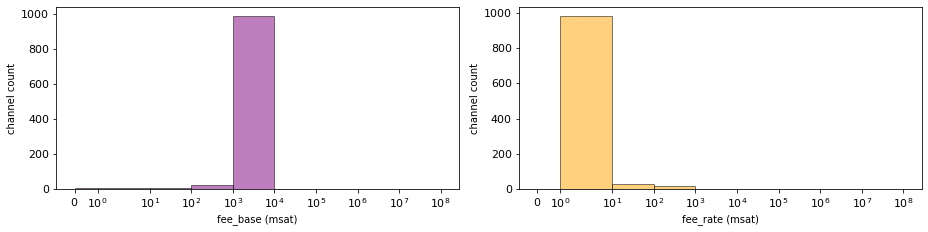

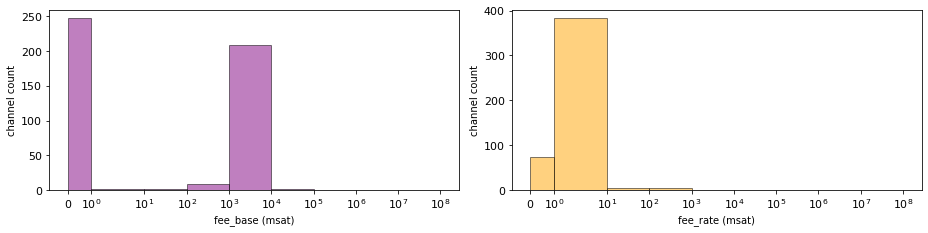

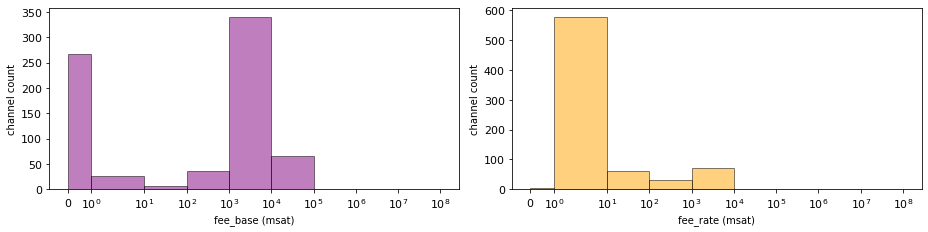

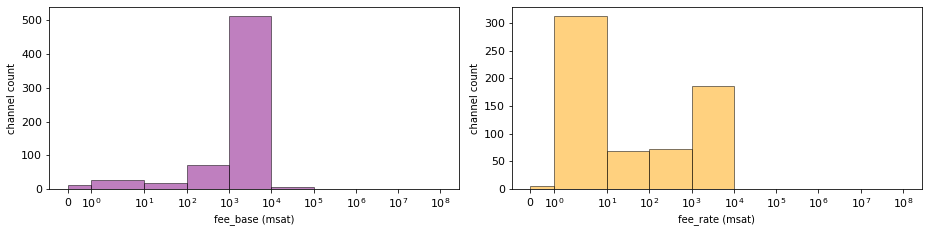

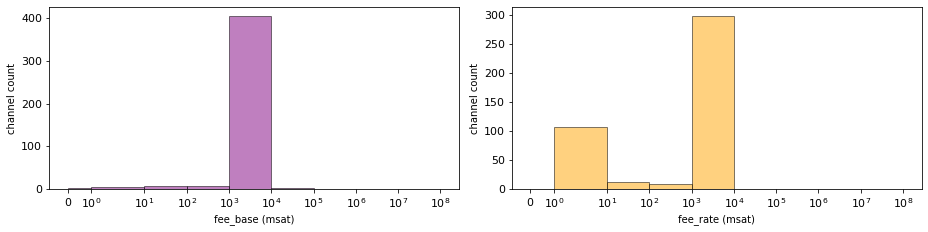

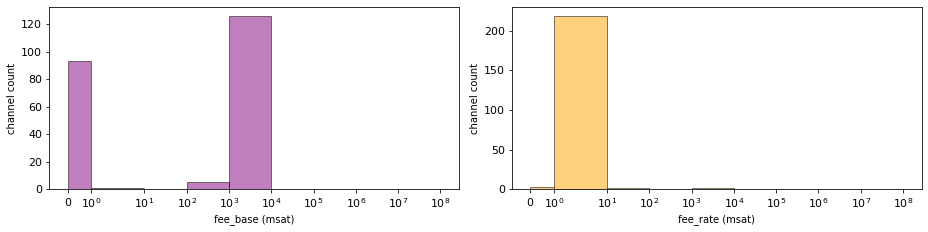

In [35]:
double_hist_fee(df_values_betw['03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f'][1],df_values_betw['03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f'][2]) #anche closeness,degree,eing
double_hist_fee(df_values_betw['02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b'][1],df_values_betw['02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b'][2]) #anche closeness,degree,eing
double_hist_fee(df_values_betw['0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266'][1],df_values_betw['0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266'][2]) #anche degree,eing
double_hist_fee(df_values_betw['023d70f2f76d283c6c4e58109ee3a2816eb9d8feb40b23d62469060a2b2867b77f'][1],df_values_betw['023d70f2f76d283c6c4e58109ee3a2816eb9d8feb40b23d62469060a2b2867b77f'][2])
double_hist_fee(df_values_betw['0242a4ae0c5bef18048fbecf995094b74bfb0f7391418d71ed394784373f41e4f3'][1],df_values_betw['0242a4ae0c5bef18048fbecf995094b74bfb0f7391418d71ed394784373f41e4f3'][2]) #anche closeness,degree
double_hist_fee(df_values_betw['02315fe3619ffdea2561bcacecada87b226723f471a59fdbfec18c4e84bcf785b2'][1],df_values_betw['02315fe3619ffdea2561bcacecada87b226723f471a59fdbfec18c4e84bcf785b2'][2])
double_hist_fee(df_values_betw['0331f80652fb840239df8dc99205792bba2e559a05469915804c08420230e23c7c'][1],df_values_betw['0331f80652fb840239df8dc99205792bba2e559a05469915804c08420230e23c7c'][2]) #anche degree,eing
double_hist_fee(df_values_betw['03abf6f44c355dec0d5aa155bdbdd6e0c8fefe318eff402de65c6eb2e1be55dc3e'][1],df_values_betw['03abf6f44c355dec0d5aa155bdbdd6e0c8fefe318eff402de65c6eb2e1be55dc3e'][2]) #anche degree,eing
double_hist_fee(df_values_betw['0297a77f4d1ccc55d7a10a9b137119b1103d9a9d38a5a97ffa1d0152c818fcdd0a'][1],df_values_betw['0297a77f4d1ccc55d7a10a9b137119b1103d9a9d38a5a97ffa1d0152c818fcdd0a'][2]) #anche degree,eing
double_hist_fee(df_values_betw['03c8dfbf829eaeb0b6dab099d87fdf7f8faceb0c1b935cd243e8c1fb5af71361cf'][1],df_values_betw['03c8dfbf829eaeb0b6dab099d87fdf7f8faceb0c1b935cd243e8c1fb5af71361cf'][2]) #anche degree,eing


## Analisi closeness centrality

In [5]:
clos = nx.closeness_centrality(G)


### grafico distribuzione valori di closeness centrality rispetto al grado dei nodi

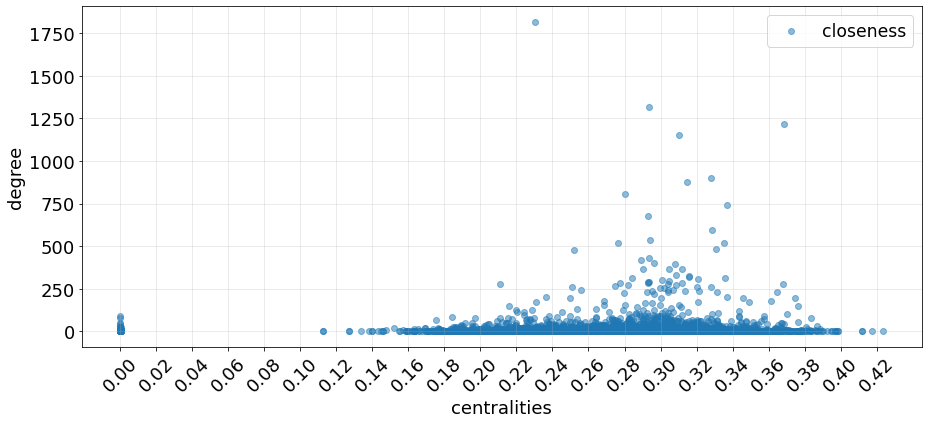

In [15]:
plt.figure(figsize=(13,6))

degrees = [ln.degree(node) for node in ln.nodes()]

plt.scatter(clos.values(), degrees, alpha=0.5)
#plt.scatter(betw.values(), degrees, alpha=0.5)
#plt.scatter(degr.values(), degrees, alpha=0.3)
    # plt.scatter(closeness, degrees, alpha=0.5)

plt.grid(b=None, alpha=0.3, which='major', axis='both')

n = len(clos)
bins = int(n**(1/float(3)))

plt.xticks(np.linspace(0,0.42,bins), rotation=45)

#plt.xticks(np.linspace(0,max(clos.values())), rotation=45)
plt.legend(["closeness"], loc='upper right', fontsize="xx-large")

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.xlabel('centralities', fontsize=18)
plt.ylabel('degree', fontsize=18)
plt.tight_layout()
plt.savefig(("clos.png"))


### selezione dei primi 10 nodi con closeness più alta

In [6]:
#primi 10 nodi più centrali secondo la closenness
sorted_closeness = sorted(clos.items(), key = operator.itemgetter(1), reverse=True)
closeness = []
for i in range(0,10,1):
    closeness.append(sorted_closeness[i][0])


In [7]:
#dizionario in cui memorizzo i canali uscenti dai nodi con closeness più alta, con le relative fee
high_clos_dict = {'node': [], 'edge_id': [],  'htlc': [], 'feebase' : [], 'feerate' : []}

for edges in G.edges(data=True):

    for n in closeness:

        u = edges[0]
        v = edges[1]

        if n == u :
            high_clos_dict['node'].append(u)
            high_clos_dict['edge_id'].append(G[u][v]['ID']) 
            high_clos_dict['htlc'].append(G[u][v]['HTLC1']) 
            high_clos_dict['feebase'].append(G[u][v]['FEEBASE1'])
            high_clos_dict['feerate'].append(G[u][v]['FEERATE1'])
            
        elif n == v :
            high_clos_dict['node'].append(v)
            high_clos_dict['edge_id'].append(G[u][v]['ID']) 
            high_clos_dict['htlc'].append(G[u][v]['HTLC2']) 
            high_clos_dict['feebase'].append(G[u][v]['FEEBASE2'])
            high_clos_dict['feerate'].append(G[u][v]['FEERATE2'])

df_clos = pd.DataFrame(data=high_clos_dict)

In [16]:
#dizionario in cui memorizzo tutti i valori delle fee applicate da un certo nodo ai suoi canali, lo uso per calcolare le distribuzioni
dict_fee_clos = {}

for n in closeness:

    dict_fee_clos[n] = {'HTLC':[],'FEEBASE':[],'FEERATE':[]}

    for i in range(len(df_clos)):

            if df_clos.loc[i,'node'] == n :

     #nodi selezionati
                dict_fee_clos[n]['HTLC'].append(df_clos.loc[i,'htlc'])
                dict_fee_clos[n]['FEEBASE'].append(df_clos.loc[i,'feebase'])
                dict_fee_clos[n]['FEERATE'].append(df_clos.loc[i,'feerate'])

df_values_clos = pd.DataFrame(data=dict_fee_clos)


### grafici distribuzioni fee dei nodi con closeness più alta

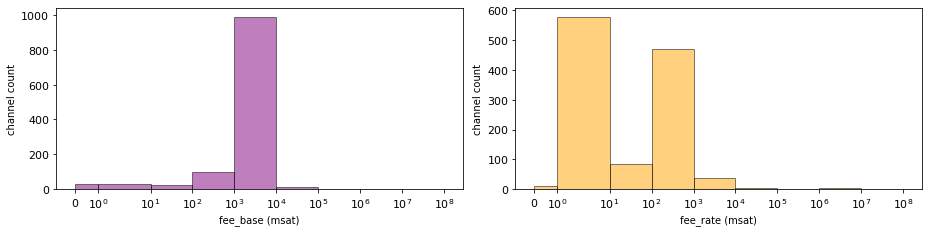

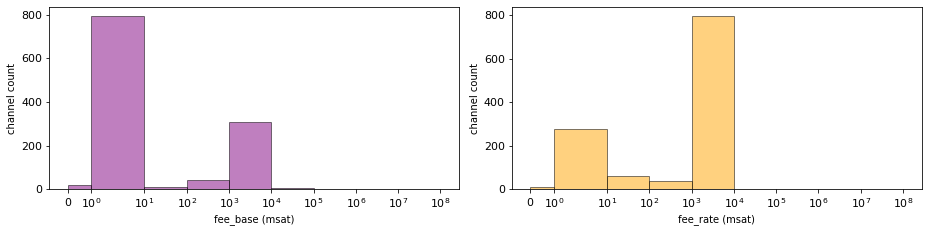

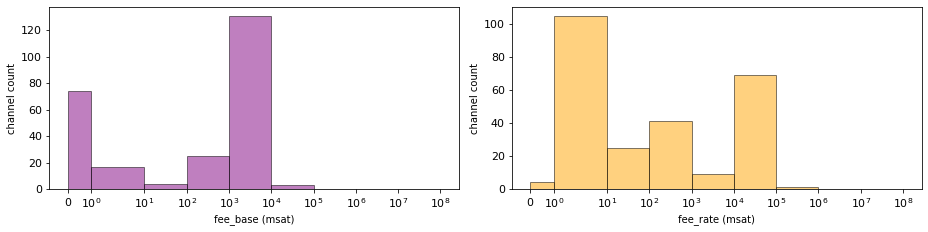

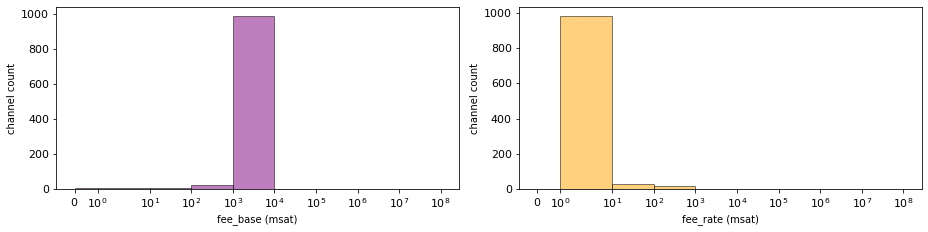

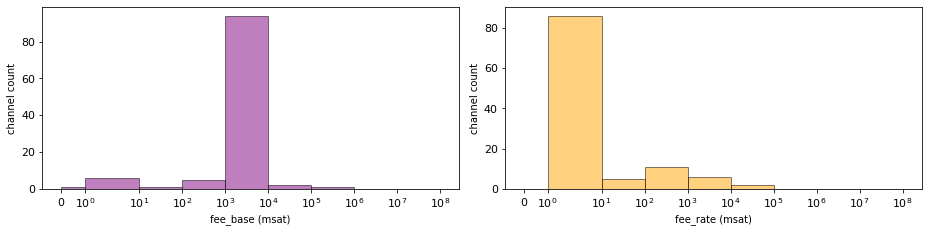

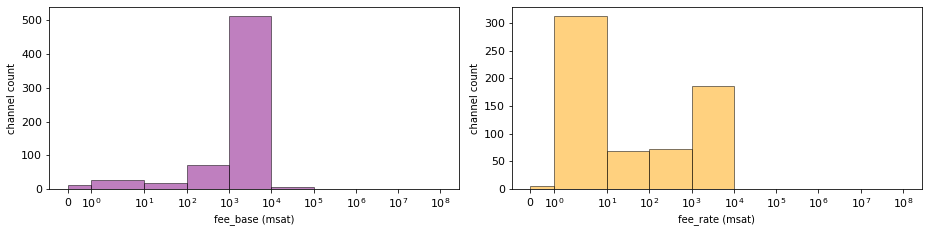

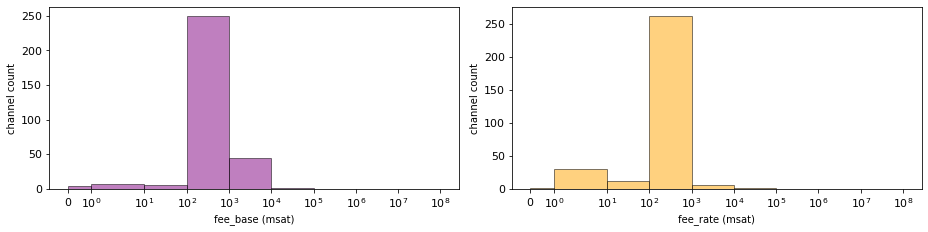

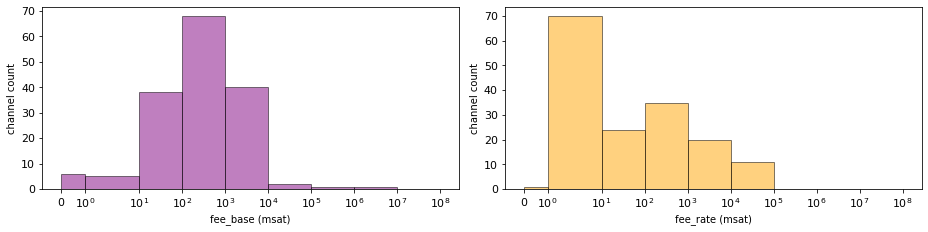

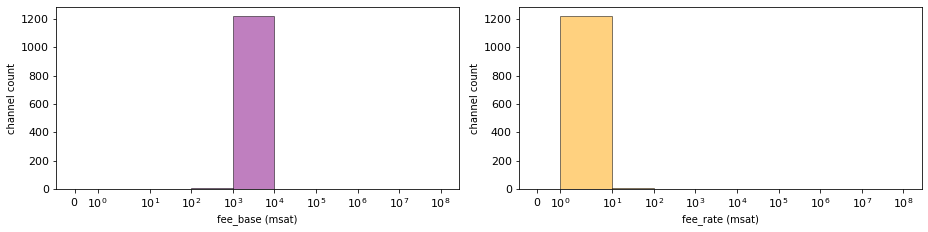

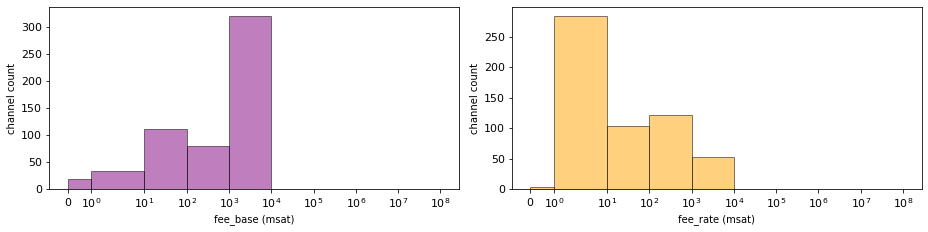

In [40]:
double_hist_fee(df_values_clos['03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f'][1],df_values_clos['03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f'][2])
double_hist_fee(df_values_clos['02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b'][1],df_values_clos['02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b'][2])
double_hist_fee(df_values_clos['039c73f53daad1050a6a72afb5353a2152f3152ee17168cd0ab28c2cb3e0050e36'][1],df_values_clos['039c73f53daad1050a6a72afb5353a2152f3152ee17168cd0ab28c2cb3e0050e36'][2])
double_hist_fee(df_values_clos['0242a4ae0c5bef18048fbecf995094b74bfb0f7391418d71ed394784373f41e4f3'][1],df_values_clos['0242a4ae0c5bef18048fbecf995094b74bfb0f7391418d71ed394784373f41e4f3'][2])
double_hist_fee(df_values_clos['02184b9576af55df1f24a2f3655d44f0b381d3183396bc9886aa8b9e40a56d1381'][1],df_values_clos['02184b9576af55df1f24a2f3655d44f0b381d3183396bc9886aa8b9e40a56d1381'][2])
double_hist_fee(df_values_clos['03abf6f44c355dec0d5aa155bdbdd6e0c8fefe318eff402de65c6eb2e1be55dc3e'][1],df_values_clos['03abf6f44c355dec0d5aa155bdbdd6e0c8fefe318eff402de65c6eb2e1be55dc3e'][2])
double_hist_fee(df_values_clos['021607cfce19a4c5e7e6e738663dfafbbbac262e4ff76c2c9b30dbeefc35c00643'][1],df_values_clos['021607cfce19a4c5e7e6e738663dfafbbbac262e4ff76c2c9b30dbeefc35c00643'][2])
double_hist_fee(df_values_clos['02b0172bb38617fa3afdb69664468b492d5a21062a4fa8b47284b0cc320e6e7420'][1],df_values_clos['02b0172bb38617fa3afdb69664468b492d5a21062a4fa8b47284b0cc320e6e7420'][2])
double_hist_fee(df_values_clos['0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266'][1],df_values_clos['0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266'][2])
double_hist_fee(df_values_clos['03bb88ccc444534da7b5b64b4f7b15e1eccb18e102db0e400d4b9cfe93763aa26d'][1],df_values_clos['03bb88ccc444534da7b5b64b4f7b15e1eccb18e102db0e400d4b9cfe93763aa26d'][2])


### analisi delle fee applicate ai vicini dei nodi più centrali

In [25]:
#memorizza in un dict : nodo vicino, feebase, feerate + valore di centralità vicino (fare un append?)
dict_neigh = {}

for node in closeness:
    dict_neigh[node] = {'vicini':[], 'feebase':[], 'feerate':[], 'closvalue': []}

    vicini = [n for n in G.neighbors(node)]

    for v in vicini :
        
        if G[node][v]['FEEBASE1']!= -1 and G[node][v]['FEERATE1'] != -1:

            dict_neigh[node]['vicini'].append(v)
            dict_neigh[node]['feebase'].append(np.ceil(G[node][v]['FEEBASE1']))
            dict_neigh[node]['feerate'].append(G[node][v]['FEERATE1'])
            dict_neigh[node]['closvalue'].append(clos[v])

In [32]:
fig = plt.figure(figsize=(20,10))
scat = plt.scatter(dict_neigh['feebase'], dict_neigh['feerate'], alpha=0.5, c=dict_neigh['closvalue'])
plt.grid(b=None, alpha=0.3, which='major', axis='both')
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.ylabel("feerate", fontsize=20)
plt.xlabel("feebase", fontsize=20)
#cb = fig.colorbar(scat)
#cb.set_label("Closeness centrality", size='xx-large')
#cb.ax.tick_params(labelsize=20)
plt.tight_layout()

#plt.savefig(DIR + str(date) + '/roses_betweenness' + date + '.png', bbox_inches='tight')

KeyError: 'feebase'

<Figure size 1440x720 with 0 Axes>

## Analisi degree centrality

In [16]:
degr = nx.degree_centrality(G)


### grafico distribuzione degree centrality rispetto al grado del nodo

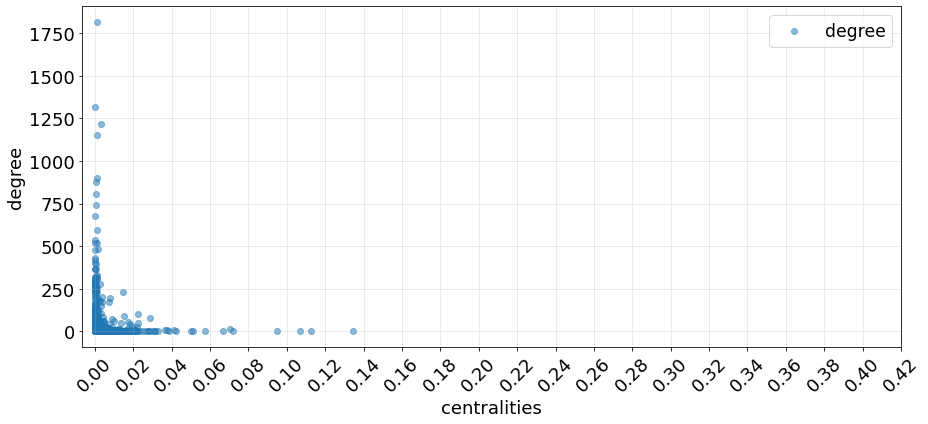

In [19]:
plt.figure(figsize=(13,6))

degrees = [ln.degree(node) for node in ln.nodes()]

plt.scatter(degr.values(), degrees, alpha=0.5)
#plt.scatter(betw.values(), degrees, alpha=0.5)
#plt.scatter(degr.values(), degrees, alpha=0.3)
    # plt.scatter(closeness, degrees, alpha=0.5)

plt.grid(b=None, alpha=0.3, which='major', axis='both')

n = len(clos)
#bins = int(n**(1/float(3)))

plt.xticks(np.linspace(0,0.42,bins), rotation=45)

#plt.xticks(np.linspace(0,max(clos.values())), rotation=45)
plt.legend(["degree"], loc='upper right', fontsize="xx-large")

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.xlabel('centralities', fontsize=18)
plt.ylabel('degree', fontsize=18)
plt.tight_layout()
plt.savefig("degreee.png")

In [30]:
sorted_deg = sorted(degr.items(), key = operator.itemgetter(1), reverse=True)
degreess = []
for i in range(0,10,1):
    degreess.append(sorted_deg[i][0])

display(degreess)

['03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f',
 '0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266',
 '02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b',
 '0242a4ae0c5bef18048fbecf995094b74bfb0f7391418d71ed394784373f41e4f3',
 '03abf6f44c355dec0d5aa155bdbdd6e0c8fefe318eff402de65c6eb2e1be55dc3e',
 '0331f80652fb840239df8dc99205792bba2e559a05469915804c08420230e23c7c',
 '023d70f2f76d283c6c4e58109ee3a2816eb9d8feb40b23d62469060a2b2867b77f',
 '02004c625d622245606a1ea2c1c69cfb4516b703b47945a3647713c05fe4aaeb1c',
 '03bb88ccc444534da7b5b64b4f7b15e1eccb18e102db0e400d4b9cfe93763aa26d',
 '03c2abfa93eacec04721c019644584424aab2ba4dff3ac9bdab4e9c97007491dda']

In [31]:
high_deg_dict = {'node': [], 'edge_id': [],  'htlc': [], 'feebase' : [], 'feerate' : []}

for edges in G.edges(data=True):

    for n in degreess:

        u = edges[0]
        v = edges[1]

        if n == u :
            high_deg_dict['node'].append(u)
            high_deg_dict['edge_id'].append(G[u][v]['ID']) 
            high_deg_dict['htlc'].append(G[u][v]['HTLC1']) 
            high_deg_dict['feebase'].append(G[u][v]['FEEBASE1'])
            high_deg_dict['feerate'].append(G[u][v]['FEERATE1'])
            
        elif n == v :
            high_deg_dict['node'].append(v)
            high_deg_dict['edge_id'].append(G[u][v]['ID']) 
            high_deg_dict['htlc'].append(G[u][v]['HTLC2']) 
            high_deg_dict['feebase'].append(G[u][v]['FEEBASE2'])
            high_deg_dict['feerate'].append(G[u][v]['FEERATE2'])

df_degree = pd.DataFrame(data=high_deg_dict)



In [32]:

dict_fee_deg = {}

for n in degreess:
    
    dict_fee_deg[n] = {'HTLC':[],'FEEBASE':[],'FEERATE':[]}

    for i in range(len(df_degree)):
     #nodi selezionati

        if df_degree.loc[i,'node'] == n :
            dict_fee_deg[n]['HTLC'].append(df_degree.loc[i,'htlc'])
            dict_fee_deg[n]['FEEBASE'].append(df_degree.loc[i,'feebase'])
            dict_fee_deg[n]['FEERATE'].append(df_degree.loc[i,'feerate'])

df_values_deg = pd.DataFrame(data=dict_fee_deg)


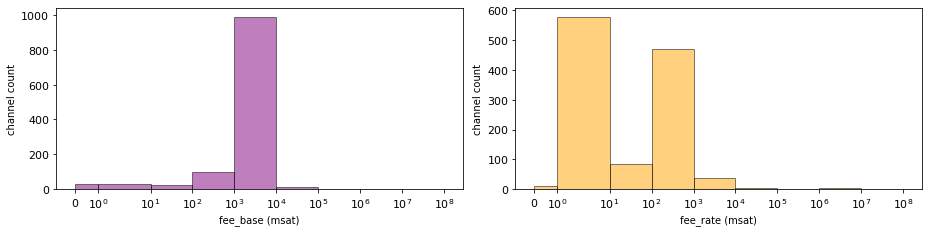

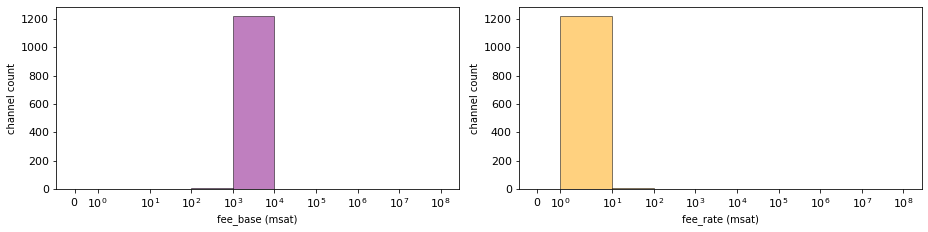

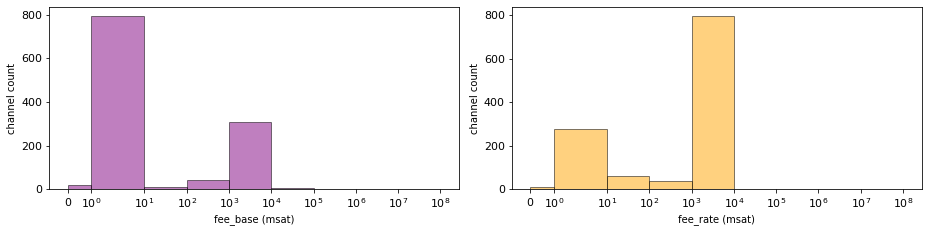

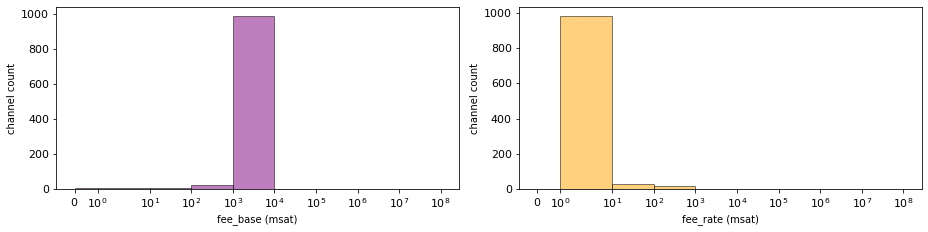

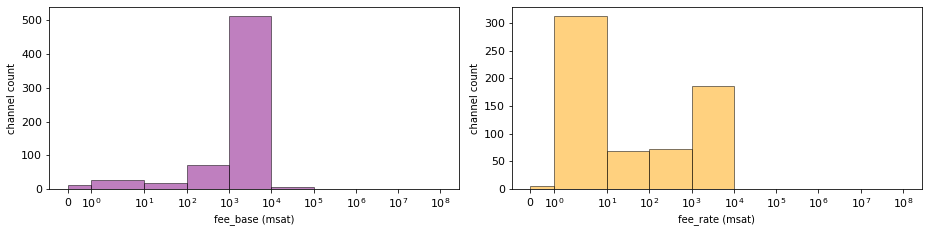

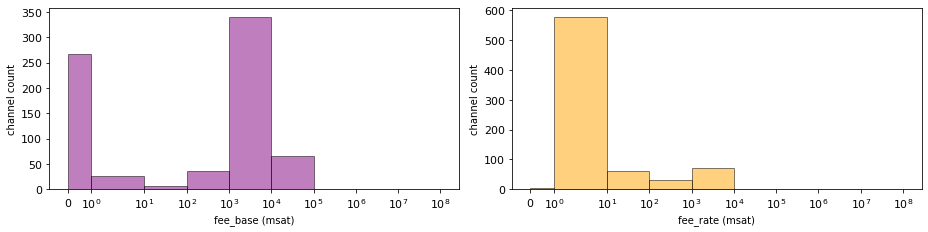

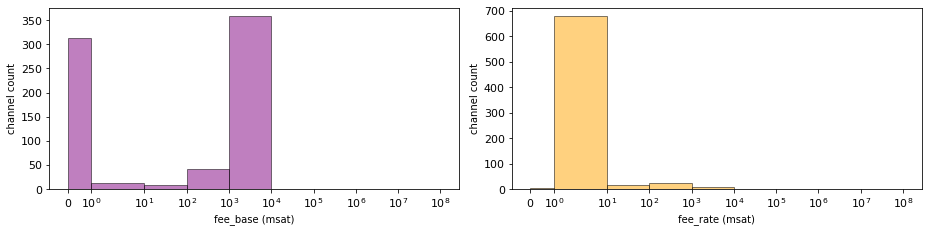

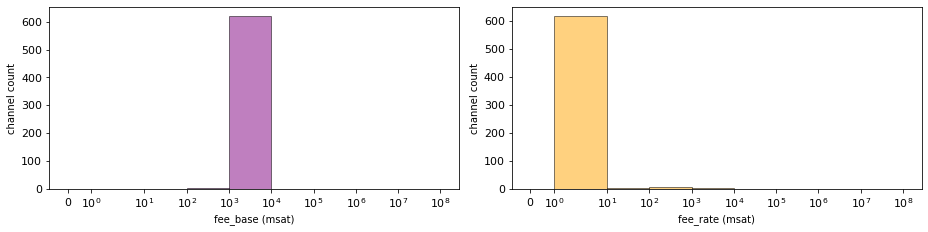

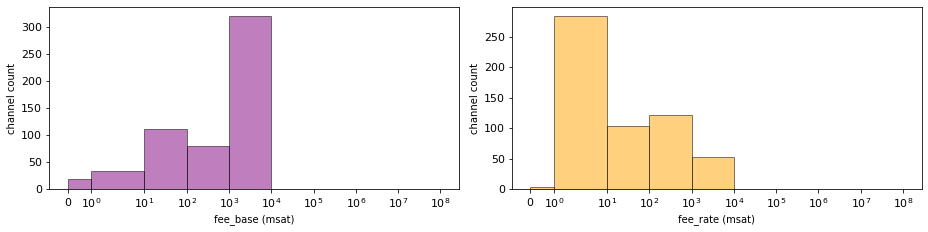

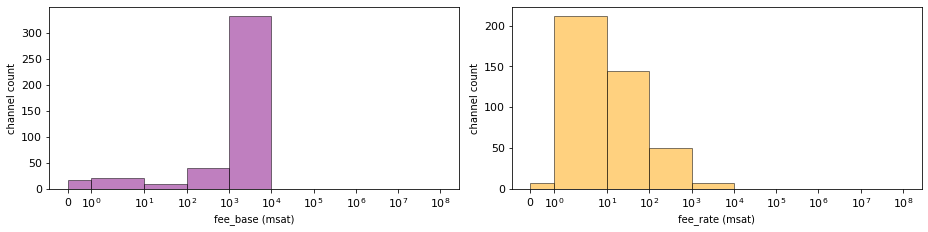

In [33]:
double_hist_fee(df_values_deg['03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f'][1],df_values_deg['03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f'][2])
double_hist_fee(df_values_deg['0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266'][1],df_values_deg['0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266'][2])
plt.savefig("centdeg.png")
double_hist_fee(df_values_deg['02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b'][1],df_values_deg['02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b'][2])
double_hist_fee(df_values_deg['0242a4ae0c5bef18048fbecf995094b74bfb0f7391418d71ed394784373f41e4f3'][1],df_values_deg['0242a4ae0c5bef18048fbecf995094b74bfb0f7391418d71ed394784373f41e4f3'][2])
double_hist_fee(df_values_deg['03abf6f44c355dec0d5aa155bdbdd6e0c8fefe318eff402de65c6eb2e1be55dc3e'][1],df_values_deg['03abf6f44c355dec0d5aa155bdbdd6e0c8fefe318eff402de65c6eb2e1be55dc3e'][2])
double_hist_fee(df_values_deg['0331f80652fb840239df8dc99205792bba2e559a05469915804c08420230e23c7c'][1],df_values_deg['0331f80652fb840239df8dc99205792bba2e559a05469915804c08420230e23c7c'][2])
double_hist_fee(df_values_deg['023d70f2f76d283c6c4e58109ee3a2816eb9d8feb40b23d62469060a2b2867b77f'][1],df_values_deg['023d70f2f76d283c6c4e58109ee3a2816eb9d8feb40b23d62469060a2b2867b77f'][2])
double_hist_fee(df_values_deg['02004c625d622245606a1ea2c1c69cfb4516b703b47945a3647713c05fe4aaeb1c'][1],df_values_deg['02004c625d622245606a1ea2c1c69cfb4516b703b47945a3647713c05fe4aaeb1c'][2])
double_hist_fee(df_values_deg['03bb88ccc444534da7b5b64b4f7b15e1eccb18e102db0e400d4b9cfe93763aa26d'][1],df_values_deg['03bb88ccc444534da7b5b64b4f7b15e1eccb18e102db0e400d4b9cfe93763aa26d'][2])
double_hist_fee(df_values_deg['03c2abfa93eacec04721c019644584424aab2ba4dff3ac9bdab4e9c97007491dda'][1],df_values_deg['03c2abfa93eacec04721c019644584424aab2ba4dff3ac9bdab4e9c97007491dda'][2])



## Analisi eingenvector centrality

In [20]:
vect = nx.eigenvector_centrality(G)

### grafico distribuzione eigenvector_centrality rispetto al grado

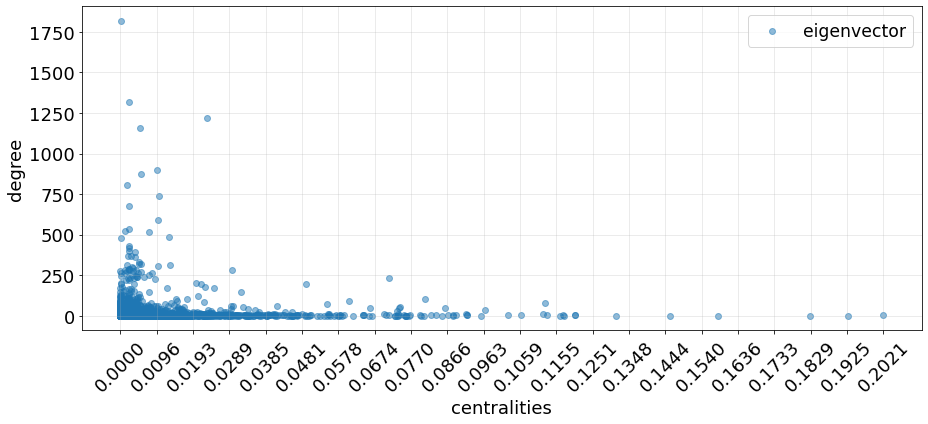

In [23]:
plt.figure(figsize=(13,6))

degrees = [ln.degree(node) for node in ln.nodes()]

plt.scatter(vect.values(), degrees, alpha=0.5)
#plt.scatter(betw.values(), degrees, alpha=0.5)
#plt.scatter(degr.values(), degrees, alpha=0.3)
    # plt.scatter(closeness, degrees, alpha=0.5)

plt.grid(b=None, alpha=0.3, which='major', axis='both')

n = len(clos)
#bins = int(n**(1/float(3)))

plt.xticks(np.linspace(0,max(vect.values()),bins), rotation=45)

#plt.xticks(np.linspace(0,max(clos.values())), rotation=45)
plt.legend(["eigenvector"], loc='upper right', fontsize="xx-large")

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.xlabel('centralities', fontsize=18)
plt.ylabel('degree', fontsize=18)
plt.tight_layout()
plt.savefig("eig.png")


In [51]:
#salva in file
#np.save('filebetweenness.npy',betw) 

#leggi in dict
n#ew_dict = np.load('filebetweenness.npy', allow_pickle='TRUE')



In [25]:
sorted_eigenvector = sorted(vect.items(), key = operator.itemgetter(1), reverse=True)
eigenvector = []
for i in range(0,10,1):
    eigenvector.append(sorted_eigenvector[i][0])

display(eigenvector)

['03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f',
 '02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b',
 '0242a4ae0c5bef18048fbecf995094b74bfb0f7391418d71ed394784373f41e4f3',
 '03abf6f44c355dec0d5aa155bdbdd6e0c8fefe318eff402de65c6eb2e1be55dc3e',
 '03bb88ccc444534da7b5b64b4f7b15e1eccb18e102db0e400d4b9cfe93763aa26d',
 '0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266',
 '0298f6074a454a1f5345cb2a7c6f9fce206cd0bf675d177cdbf0ca7508dd28852f',
 '021607cfce19a4c5e7e6e738663dfafbbbac262e4ff76c2c9b30dbeefc35c00643',
 '03c2abfa93eacec04721c019644584424aab2ba4dff3ac9bdab4e9c97007491dda',
 '02a04446caa81636d60d63b066f2814cbd3a6b5c258e3172cbdded7a16e2cfff4c']

In [26]:
high_eigvect_dict = {'node': [], 'edge_id': [],  'htlc': [], 'feebase' : [], 'feerate' : []}

for edges in G.edges(data=True):

    for n in eigenvector:

        u = edges[0]
        v = edges[1]

        if n == u :
            high_eigvect_dict['node'].append(u)
            high_eigvect_dict['edge_id'].append(G[u][v]['ID']) 
            high_eigvect_dict['htlc'].append(G[u][v]['HTLC1']) 
            high_eigvect_dict['feebase'].append(G[u][v]['FEEBASE1'])
            high_eigvect_dict['feerate'].append(G[u][v]['FEERATE1'])
            
        elif n == v :
            high_eigvect_dict['node'].append(v)
            high_eigvect_dict['edge_id'].append(G[u][v]['ID']) 
            high_eigvect_dict['htlc'].append(G[u][v]['HTLC2']) 
            high_eigvect_dict['feebase'].append(G[u][v]['FEEBASE2'])
            high_eigvect_dict['feerate'].append(G[u][v]['FEERATE2'])

df_eigenvector = pd.DataFrame(data=high_eigvect_dict)


In [27]:
dict_fee_eig = {}

for n in eigenvector:
    
    dict_fee_eig[n] = {'HTLC':[],'FEEBASE':[],'FEERATE':[]}

    for i in range(len(df_eigenvector)):
     #nodi selezionati

        if df_eigenvector.loc[i,'node'] == n :
            dict_fee_eig[n]['HTLC'].append(df_eigenvector.loc[i,'htlc'])
            dict_fee_eig[n]['FEEBASE'].append(df_eigenvector.loc[i,'feebase'])
            dict_fee_eig[n]['FEERATE'].append(df_eigenvector.loc[i,'feerate'])

df_values_eig = pd.DataFrame(data=dict_fee_eig)



### grafici distribuzioni fee imposte dai nodi con higher eingenvector

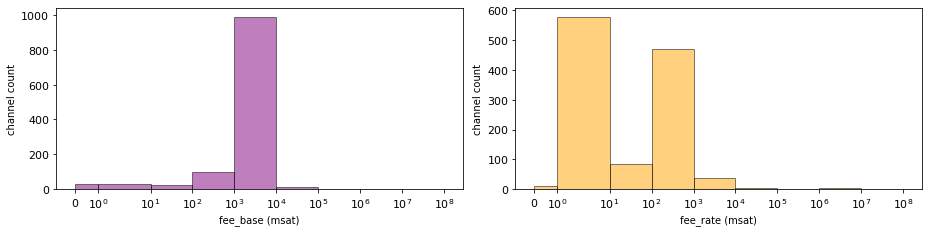

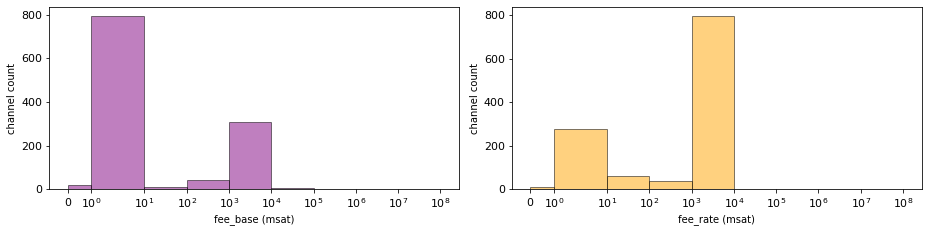

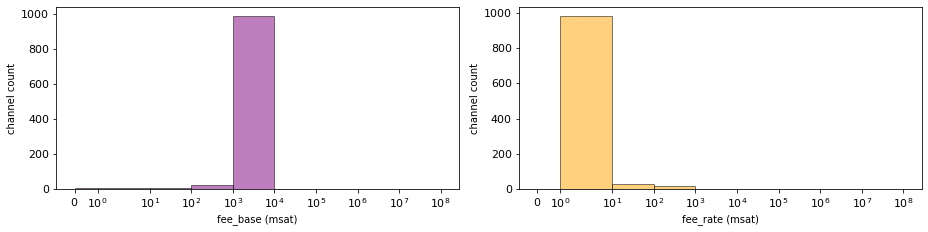

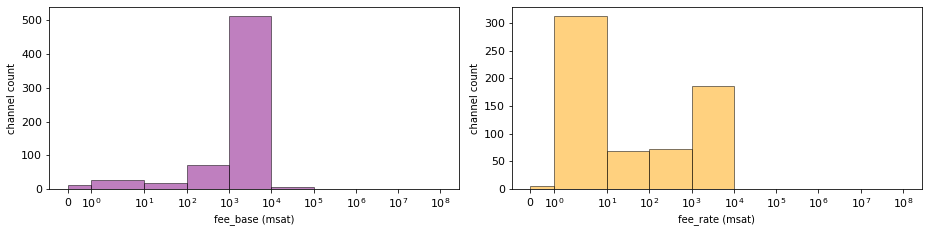

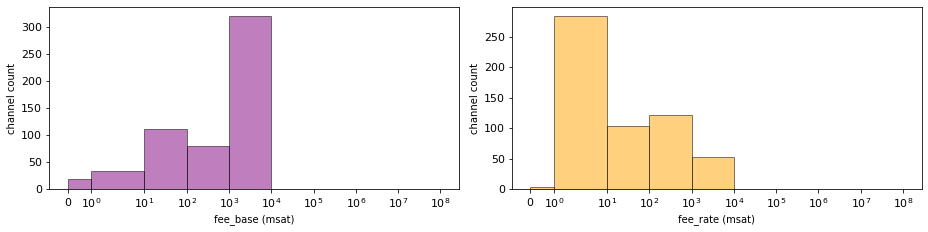

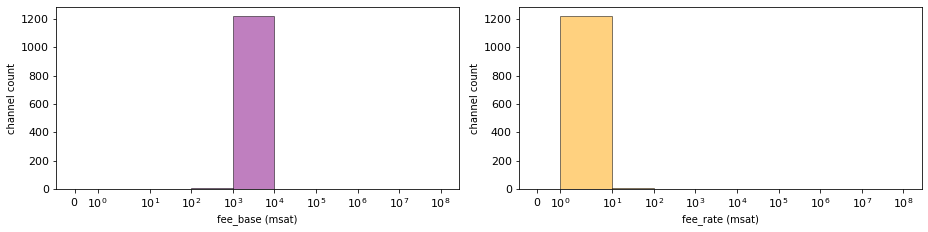

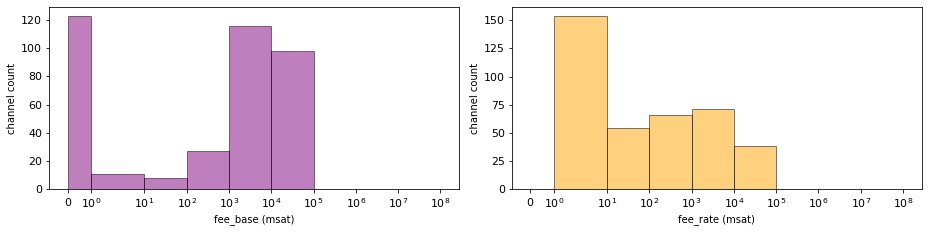

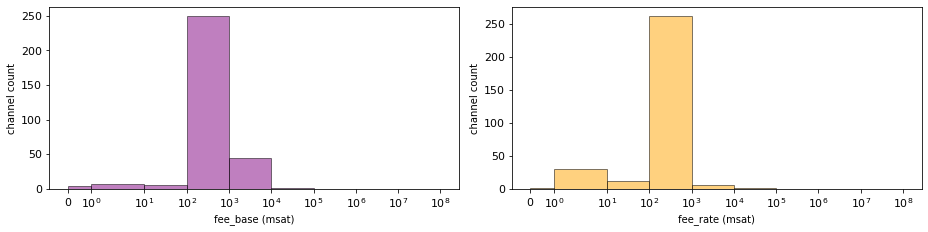

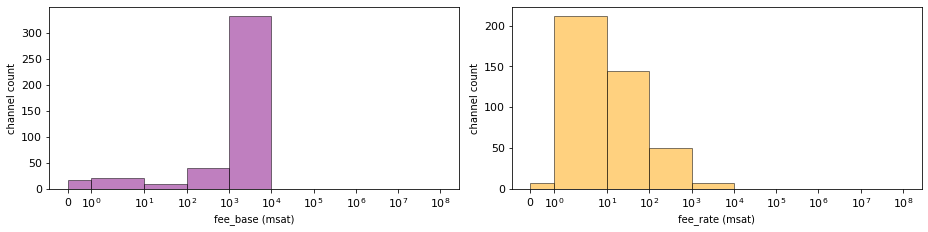

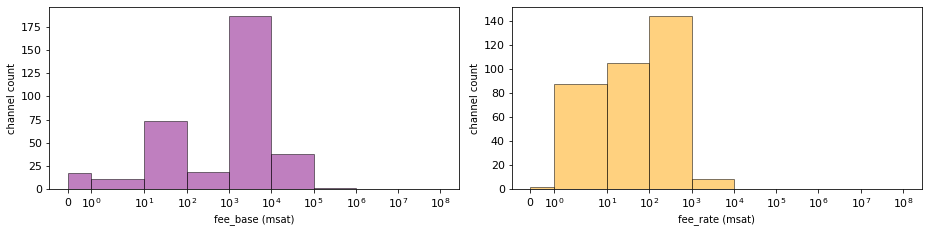

In [34]:
double_hist_fee(df_values_eig['03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f'][1],df_values_eig['03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f'][2])
plt.savefig("maxcentr.png")
double_hist_fee(df_values_eig['02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b'][1],df_values_eig['02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b'][2])
plt.savefig("maxcentr2.png")

double_hist_fee(df_values_eig['0242a4ae0c5bef18048fbecf995094b74bfb0f7391418d71ed394784373f41e4f3'][1],df_values_eig['0242a4ae0c5bef18048fbecf995094b74bfb0f7391418d71ed394784373f41e4f3'][2])
plt.savefig("maxeing.png")
double_hist_fee(df_values_eig['03abf6f44c355dec0d5aa155bdbdd6e0c8fefe318eff402de65c6eb2e1be55dc3e'][1],df_values_eig['03abf6f44c355dec0d5aa155bdbdd6e0c8fefe318eff402de65c6eb2e1be55dc3e'][2])
double_hist_fee(df_values_eig['03bb88ccc444534da7b5b64b4f7b15e1eccb18e102db0e400d4b9cfe93763aa26d'][1],df_values_eig['03bb88ccc444534da7b5b64b4f7b15e1eccb18e102db0e400d4b9cfe93763aa26d'][2])
double_hist_fee(df_values_eig['0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266'][1],df_values_eig['0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266'][2])
double_hist_fee(df_values_eig['0298f6074a454a1f5345cb2a7c6f9fce206cd0bf675d177cdbf0ca7508dd28852f'][1],df_values_eig['0298f6074a454a1f5345cb2a7c6f9fce206cd0bf675d177cdbf0ca7508dd28852f'][2])
double_hist_fee(df_values_eig['021607cfce19a4c5e7e6e738663dfafbbbac262e4ff76c2c9b30dbeefc35c00643'][1],df_values_eig['021607cfce19a4c5e7e6e738663dfafbbbac262e4ff76c2c9b30dbeefc35c00643'][2])
double_hist_fee(df_values_eig['03c2abfa93eacec04721c019644584424aab2ba4dff3ac9bdab4e9c97007491dda'][1],df_values_eig['03c2abfa93eacec04721c019644584424aab2ba4dff3ac9bdab4e9c97007491dda'][2])
double_hist_fee(df_values_eig['02a04446caa81636d60d63b066f2814cbd3a6b5c258e3172cbdded7a16e2cfff4c'][1],df_values_eig['02a04446caa81636d60d63b066f2814cbd3a6b5c258e3172cbdded7a16e2cfff4c'][2])


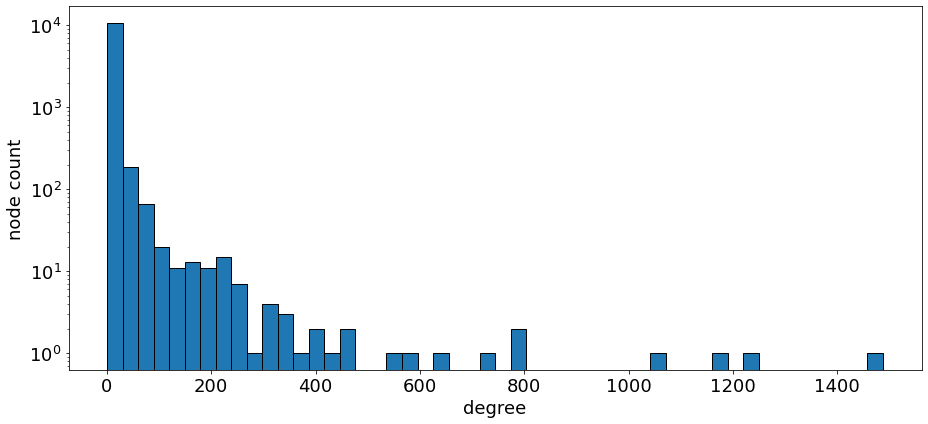

In [116]:
    #istogramma: distribuzione del grado dei nodi
    #gradi dei nodi della LN passata come argomento
    degrees = [G.degree(node) for node in G.nodes()]

    n = len(degrees)
    bins=50
    
    plt.figure(figsize=(13,6))
    plt.tick_params(axis='x', labelsize=18)
    plt.tick_params(axis='y', labelsize=18)
    plt.xlabel('degree', fontsize=18)
    plt.ylabel('node count',fontsize=18)
    plt.yscale('log')
    plt.hist(degrees, bins = bins, edgecolor = 'black')
    plt.tight_layout()
    plt.savefig("degrees.png")

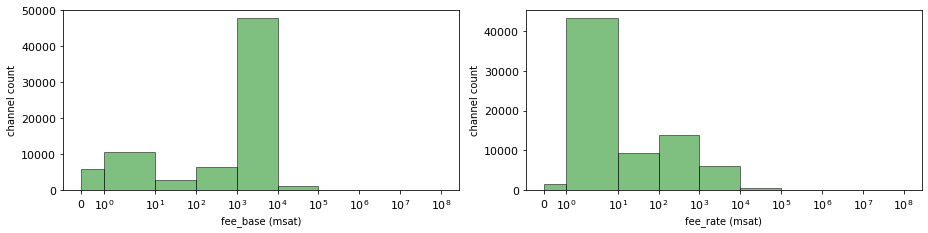

In [115]:
plt.figure(figsize=(13,6))
a1 = plt.subplot(2,2,1)
a1.tick_params(axis='x', labelsize=11)
a1.tick_params(axis='y', labelsize=11)
plt.xlabel('fee_base (msat)', fontsize=10)
plt.ylabel('channel count',fontsize=10)
#plt.yscale('log')
plt.xscale('symlog')
a1.hist(feebase, bins = [0,1,10,100,1000,10000,100000,1000000,10000000,100000000], alpha = 0.5, edgecolor ='black', color = 'green')
plt.tight_layout()


a2=plt.subplot(2, 2, 2)
a2.tick_params(axis='x', labelsize=11)
a2.tick_params(axis='y', labelsize=11)
plt.xlabel('fee_rate (msat)', fontsize=10)
plt.ylabel('channel count',fontsize=10)
#plt.yscale('log')
plt.xscale('symlog')
a2.hist(feerate, bins = [0,1,10,100,1000,10000,100000,1000000,10000000,100000000], alpha = 0.5, edgecolor ='black', color = 'green')
plt.tight_layout()

plt.savefig("fees_all.png")



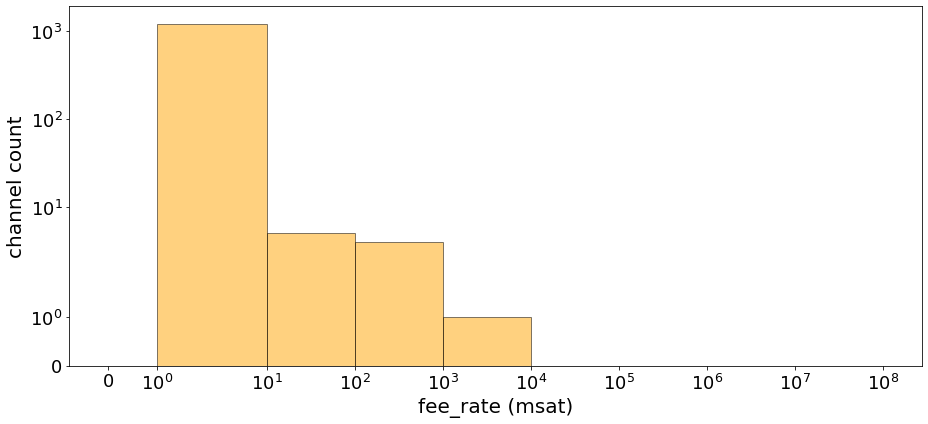

In [79]:
feerate_distribution(df_values['0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266'][2])

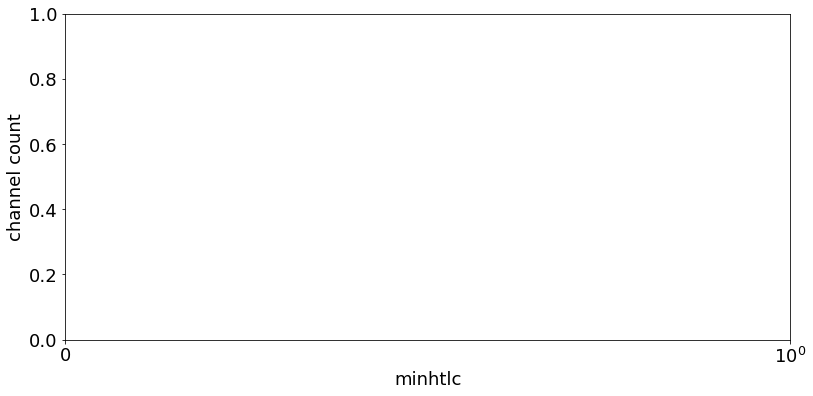

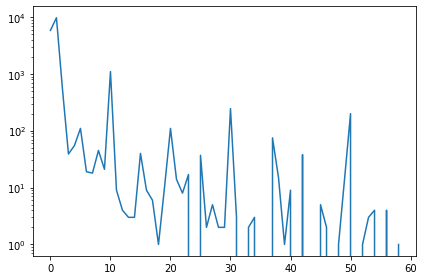

In [385]:
plt.figure(figsize=(13,6))
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.xlabel('minhtlc', fontsize=18)
plt.ylabel('channel count',fontsize=18)
plt.xscale('symlog')
y,x = np.histogram(feebase, 
        bins = np.arange(60))

fig, ax = plt.subplots()
ax.plot(x[:-1], y)

#xrange = (0,10000000)


#plt.hist(feebase, bins = 30, alpha = 0.5, edgecolor ='black', color = 'green',range=xrange)

plt.yscale('log')
#plt.hist(htlc, bins = bins, edgecolor = 'black')
plt.tight_layout()


# ***ANALISI CAMPO ROUTING***


### ***def*** : se ROUTING = 1 il nodo consente il routing, se = 0 il routing non è consentito

In [27]:
#canali su cui non avvengono inoltri su in nessuna delle due direzioni
channels_two_not = [d['CHANNELID'] for u,v,d in ln.edges.data() if d['ROUTING1'] == 0 and d['ROUTING2'] == 0]
#canali su cui avvengono inoltri su in una direzione
channels_one_not = [d['CHANNELID'] for u,v,d in ln.edges.data() if d['ROUTING1'] == 0 or d['ROUTING2'] == 0]

display(len(channels_two_not))
display(len(channels_one_not))

perc_two_not = int(len(channels_two_not) / ln.number_of_edges() * 100)
print("Il ", perc_two_not, " % dei canali in nessuna direzione. ")

perc_one_not = int(len(channels_one_not) / ln.number_of_edges() * 100)
print("Il ", perc_one_not, " % dei canali in una direzione. ")

1524

12043

Il  3  % dei canali in nessuna direzione. 
Il  28  % dei canali in una direzione. 


In [4]:
#creo il sottografo solo con i canali su cui vengono inoltrati i pagamenti in entrambe le direzioni

subgraph = nx.MultiGraph(data=True)

nodes_set = set()
edges = []

for u,v,d in ln.edges(data=True):
    if d['CHANNELID'] not in channels_two_not:
        edges.append((u,v,d))

for (u,v,d) in edges:
    nodes_set.add(u)
    nodes_set.add(v)
nodes = list(nodes_set)


subgraph.add_edges_from(edges)
subgraph.add_nodes_from(nodes)

nx.write_gml(subgraph, "output\grafi\multigraforouting.gml")


KeyboardInterrupt: 

In [18]:
htlc1_sub = [int(c) for (u, v, c) in subgraph.edges.data('MINHTLC1')]
htlc2_sub = [int(c) for (u, v, c) in subgraph.edges.data('MINHTLC2')]
htlc_sub2 = htlc1_sub+htlc2_sub 
feebase1_sub = [c for (u, v, c) in subgraph.edges.data('FEEBASE1')]
feebase2_sub = [c for (u, v, c) in subgraph.edges.data('FEEBASE2')]
feebase_sub2 = feebase1_sub + feebase2_sub
feerate1_sub = [int(c) for (u, v, c) in subgraph.edges.data('FEERATE1')]
feerate2_sub = [int(c) for (u, v, c) in subgraph.edges.data('FEERATE2')]
feerate_sub2 = feerate1_sub + feerate2_sub

### grafici delle distribuzioni delle fee sui canali in cui il routing è consentito in una sola direzione

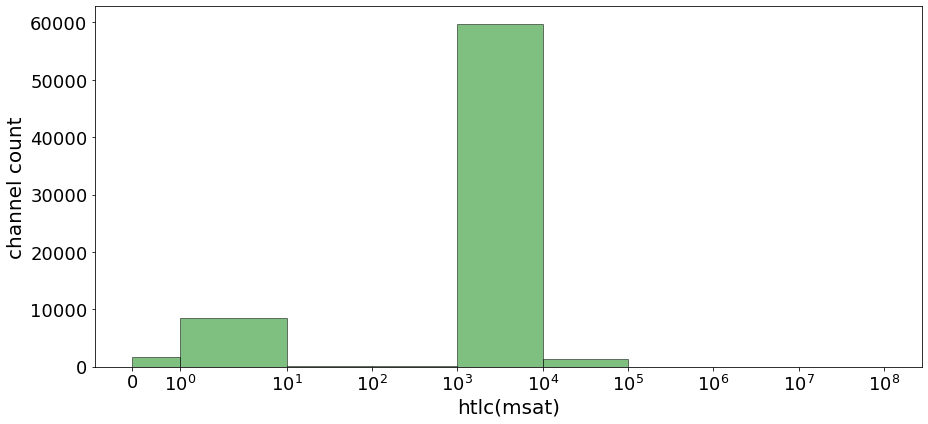

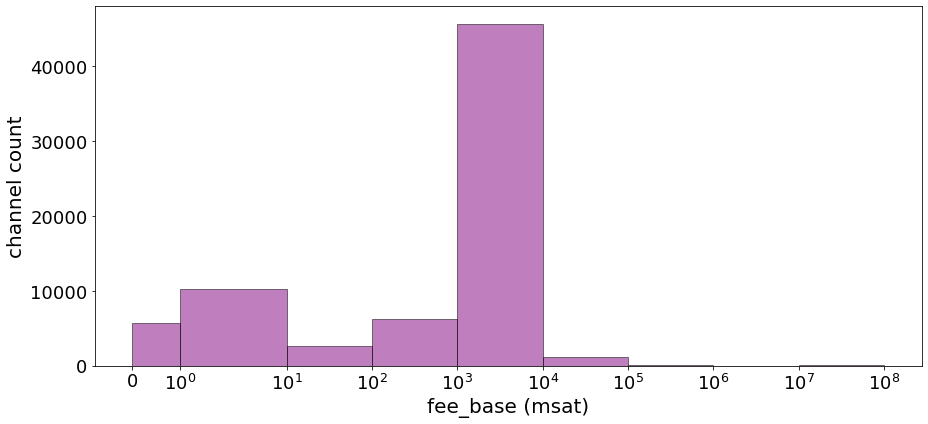

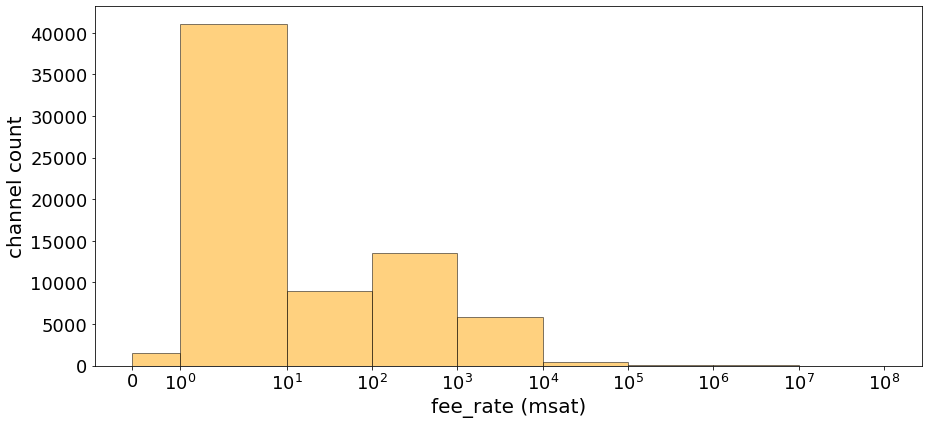

In [13]:
htlc_distribution(htlc_sub2)
feebase_distribution(feebase_sub2)
feerate_distribution(feerate_sub2)

In [5]:
#creo il sottografo solo con i canali su cui vengono inoltrati i pagamenti in una sola direzione

subgraph2 = nx.MultiGraph(data=True)

nodes_set = set()
edges = []

for u,v,d in ln.edges(data=True):
    if d['CHANNELID'] in channels_one_not:
        edges.append((u,v,d))

for (u,v,d) in edges:
    nodes_set.add(u)
    nodes_set.add(v)
nodes = list(nodes_set)


subgraph2.add_edges_from(edges)
subgraph2.add_nodes_from(nodes)

nx.write_gml(subgraph2, "output\grafi\multigraforouting2.gml")

In [16]:
len(channels_one_not)

12043

In [20]:
htlc1_sub2 = [d['MINHTLC1'] for u,v,d in subgraph2.edges.data() if d['ROUTING1'] == 1 and d['ROUTING2'] == 0]
htlc2_sub2 = [d['MINHTLC2'] for u,v,d in subgraph2.edges.data() if d['ROUTING2'] == 1  and d['ROUTING1'] == 0]
htlc_sub2 = htlc1_sub2+htlc2_sub2
feebase1_sub2 = [d['FEEBASE1'] for u,v,d in subgraph2.edges.data() if d['ROUTING1'] == 1 and d['ROUTING2'] == 0]
feebase2_sub2 = [d['FEEBASE2'] for u,v,d in subgraph2.edges.data() if d['ROUTING2'] == 1  and d['ROUTING1'] == 0]
feebase_sub2 = feebase1_sub2 + feebase2_sub2
feerate1_sub2 = [int(d['FEERATE1']) for u,v,d in subgraph2.edges.data() if d['ROUTING1'] == 1 and d['ROUTING2'] == 0]
feerate2_sub2 = [int(d['FEERATE2']) for u,v,d in subgraph2.edges.data() if d['ROUTING2'] == 1  and d['ROUTING1'] == 0]
feerate_sub2 = feerate1_sub2 + feerate2_sub2

In [15]:
display(len(htlc_sub2))
display(len(feebase_sub2))
display(len(feerate_sub2))

7591

7591

7591

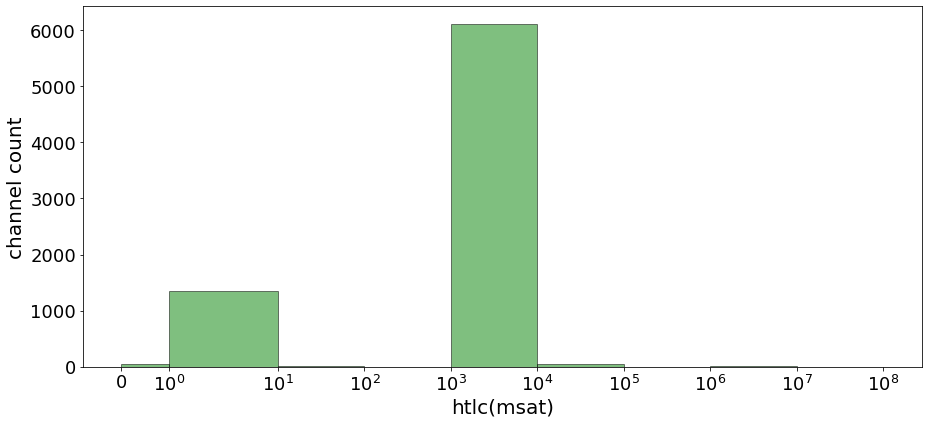

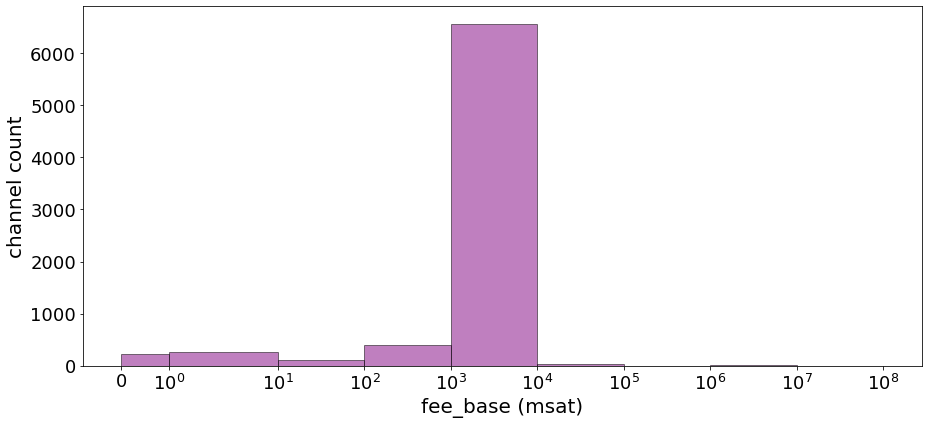

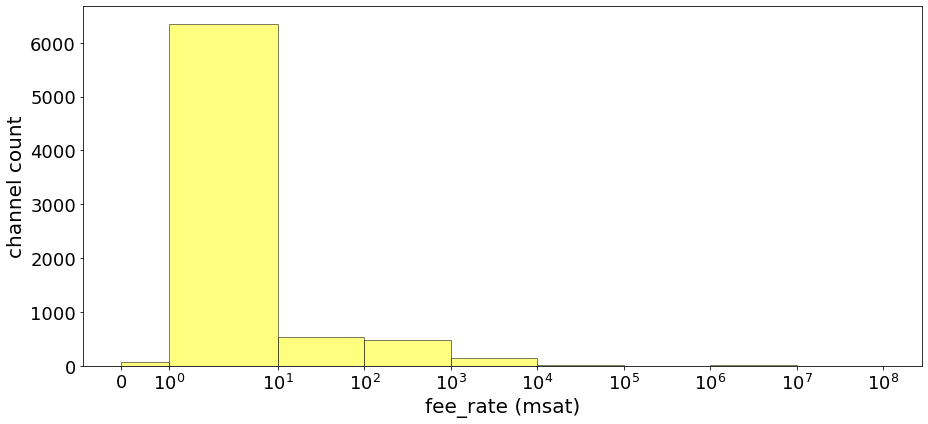

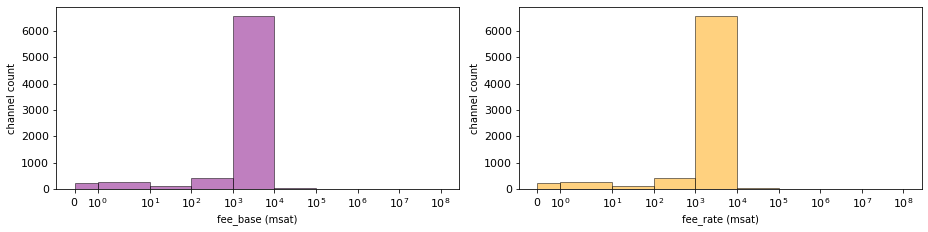

In [21]:
htlc_distribution(htlc_sub2)
feebase_distribution(feebase_sub2)
feerate_distribution(feerate_sub2)
double_hist_fee(feebase_sub2, feebase_sub2)
plt.savefig("doublefeeone.png")